In [12]:
%load_ext autoreload
%autoreload 2

from clustering_comparison import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Clustering Comparisons for Spectral Imaging Data

Using many different clustering methods for comparing the differentiation between pmma and other plastics as well as materials such as glass and steel. This has application in Non Destructive Testing as well as in medical imaging. Images were aquired at 120 kVp with a spectral imaging detector. Clusters were evaluated using a manually created mask for each element. The variable used was the vscore since it is includes both homogeneity and completeness, both of which I would like to take into account.

/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceW

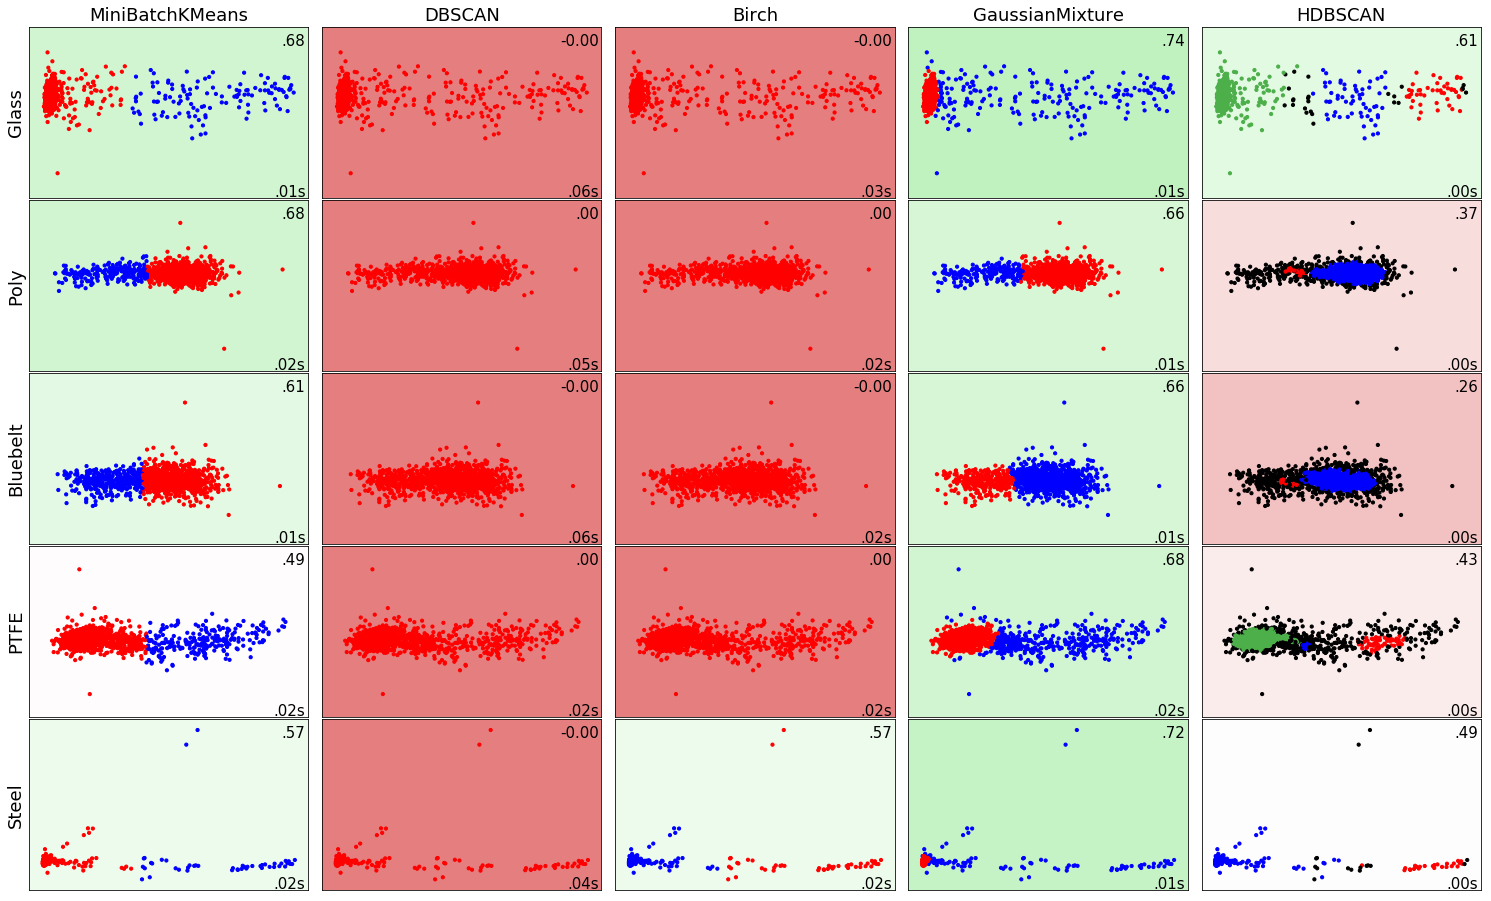

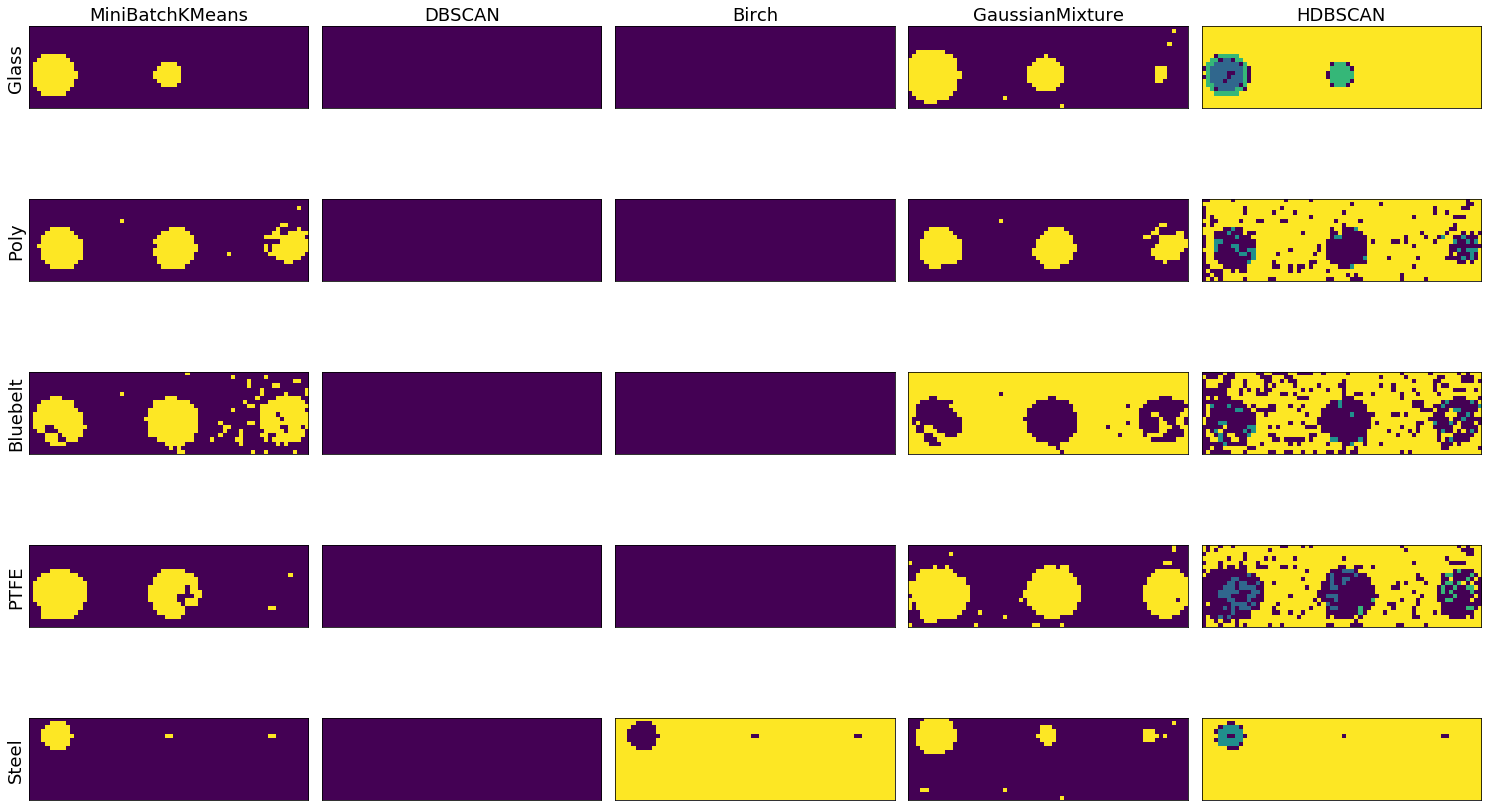

In [4]:
plot_results(1,1,0)

This first plotting function shows the results of using pca to reduce the 5 energy bins into two pc's for visualization. Runtime of the algorithm is shown on the bottom right and vscore on the top right. The scatter plot background is scales to the vscore. I will use this method as the benchmark. Below are the vscores plotted for the indevidual algorithms and materials.

/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceW

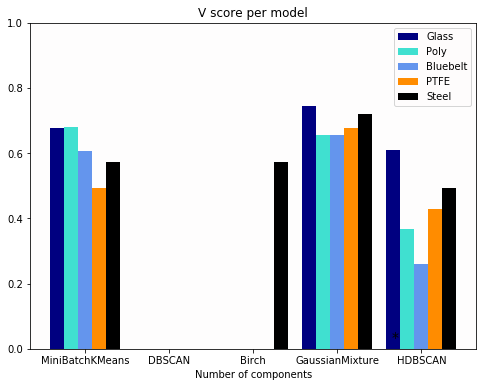

In [5]:
plot_results(0,0,1)

As you can see the V score is best for the Gaussian Mixture (GM) and the KMeans (KM). However some of the algorithms are badly tuned right now so we shall try to improve that.

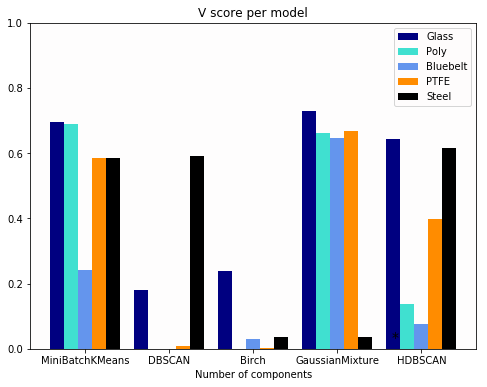

In [6]:
plot_results(0,0,1,scale=True)

Now I have scaled the inputs with sklearn standard scaler. One can see that birch and DBSCAN are sensitive to this parameter. However since the data is PC's the scaling is already a relevant input so this should not further improve the GM and KM.

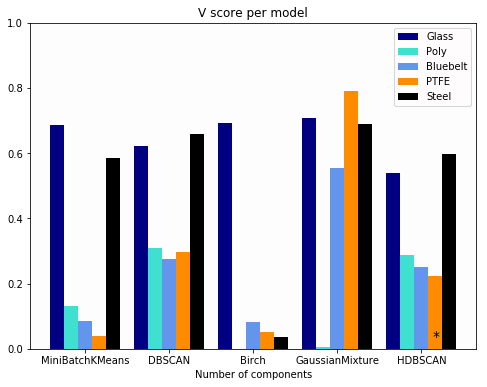

In [9]:
plot_results(0,0,1,scale=True,w_positions=True)

If we include the position data with the PCs some DBSCAN and Birch start to perk up but the GM still seems to be the leader using no position or scaling. Now you may be thinking that these plots looks suspiciously random, so lets try with a different random number seed:

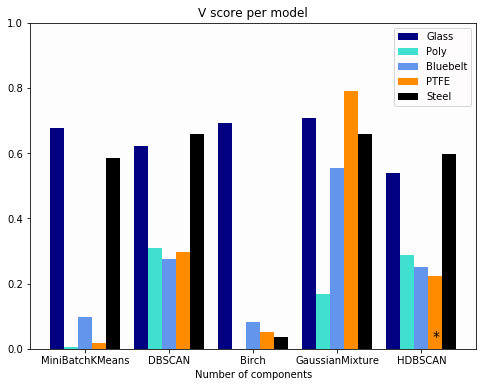

In [10]:
plot_results(0,0,1,scale=True,w_positions=True,rng=100)

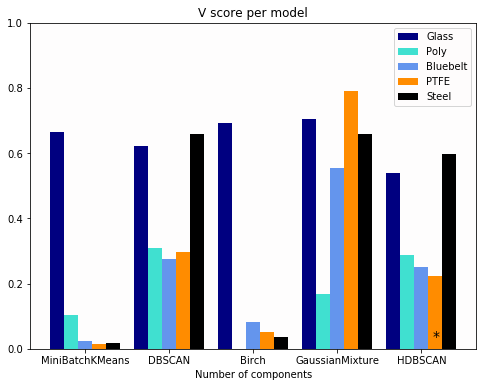

In [11]:
plot_results(0,0,1,scale=True,w_positions=True,rng=200)

We see that there is variance however the general pattern is remaining the same (he says waving his hands because he doesn't want to do the stdev).

Now what is important to spectral imaging is that the results are better than other imaging modalities such as single energy imaging (much much cheaper) and dual energy (much cheaper):

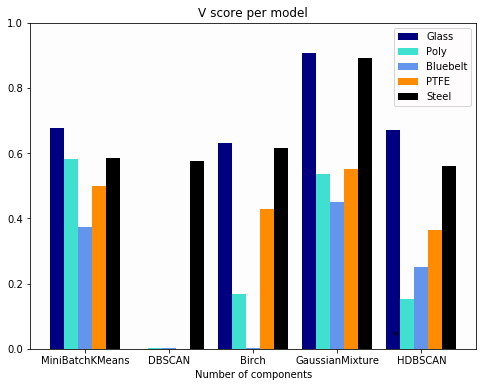

In [14]:
plot_results(0,0,1,mode='se',scale=True)

Bad news, glass and steel seem to reach the highest values when using single energy projection, however the plastics still have hope for spectral imaging. This is likely expected since the signal for these materials comes mostly from the density differences between PMMA (background) and glass/steel. Whereas for plastics the composition becomes important which can be determined by dual energy or spectral imaging. Lets try the same with positions now.

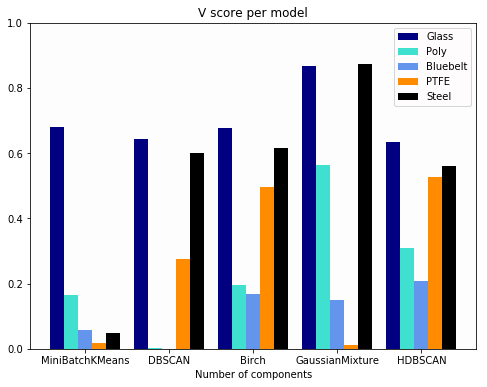

In [15]:
plot_results(0,0,1,mode='se',scale=True,w_positions=True)

Interestingly the plastics don't improve with position data. We will look into this with the dual energy case:

/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceW

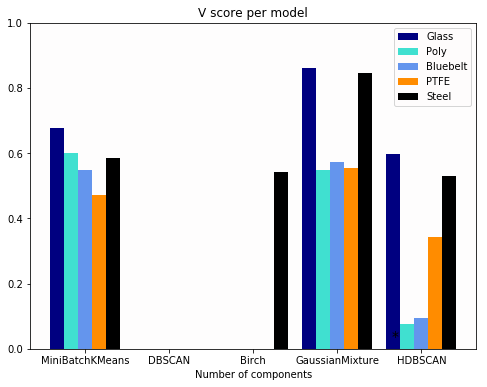

In [18]:
plot_results(0,0,1,mode='de')

Pretty good but still not the best on the plastics. Now lets have a look inside the clusters between adding the position data and not.

/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceW

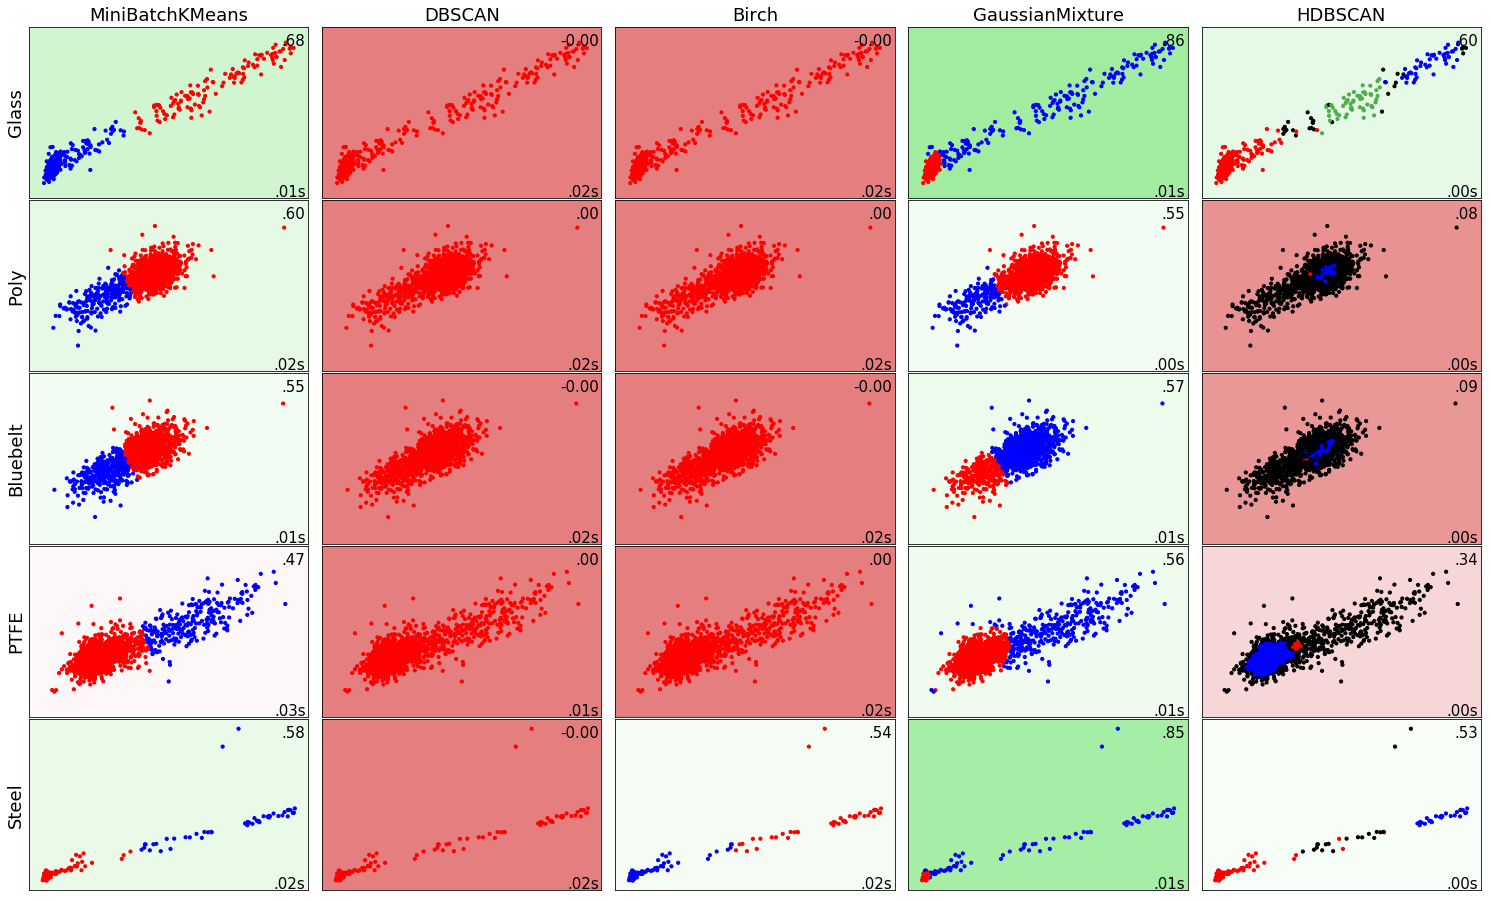

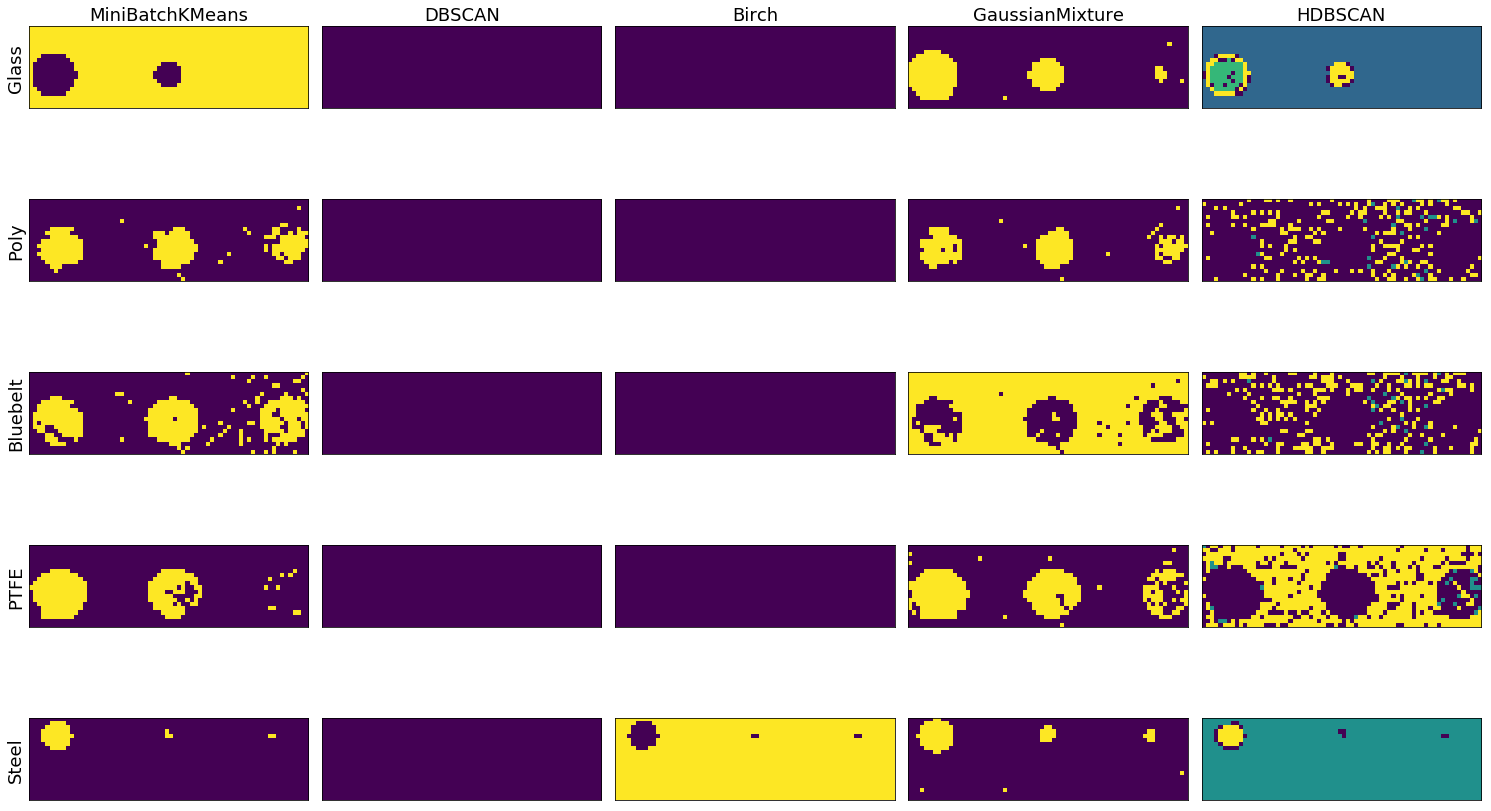

In [19]:
plot_results(1,1,0,mode='de')

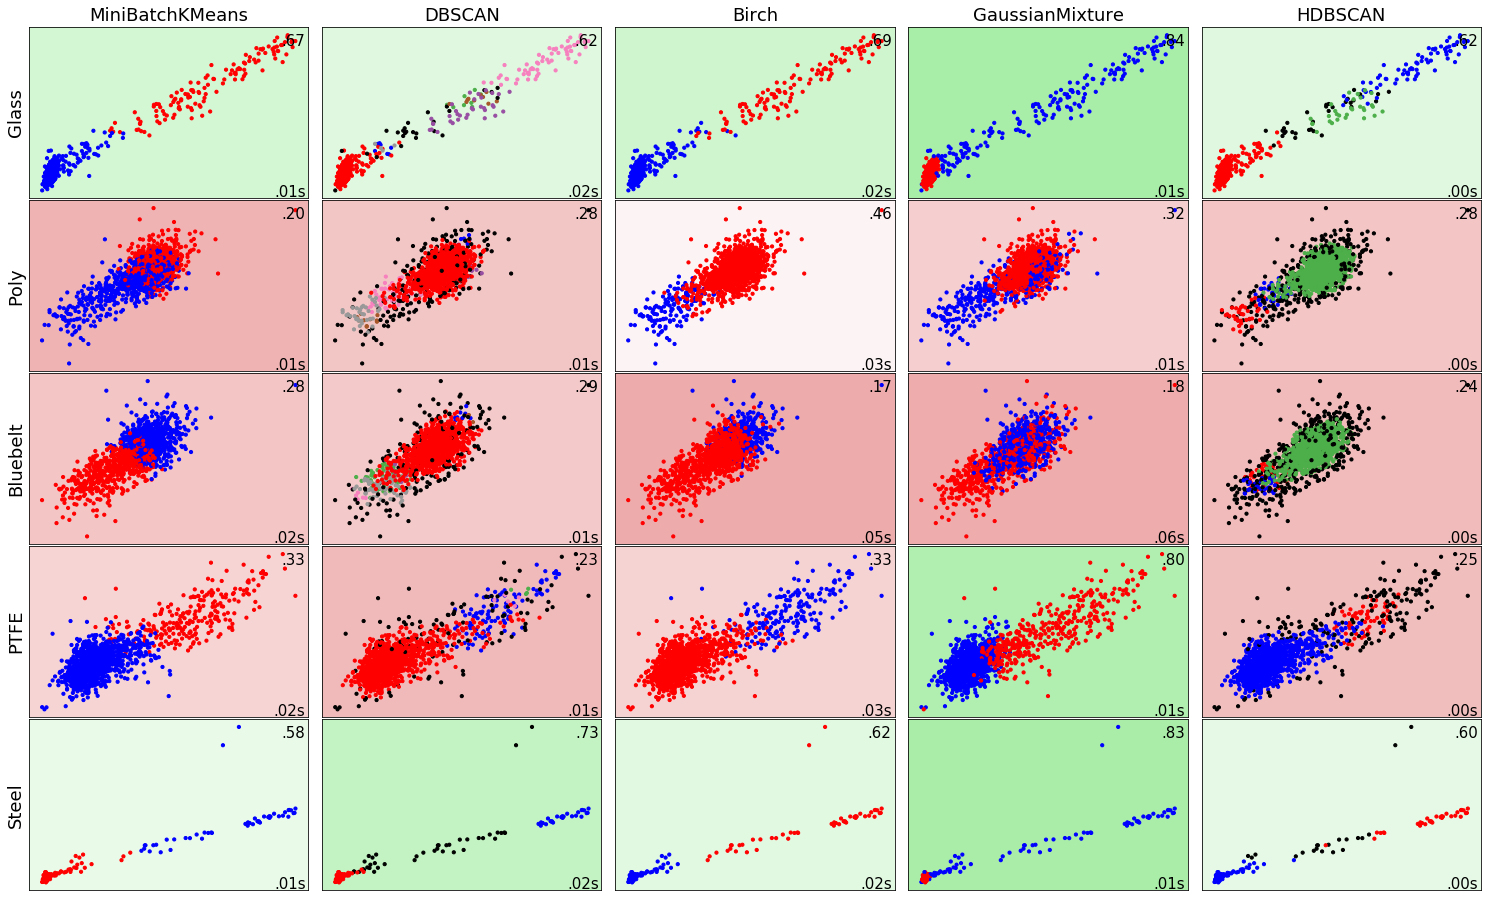

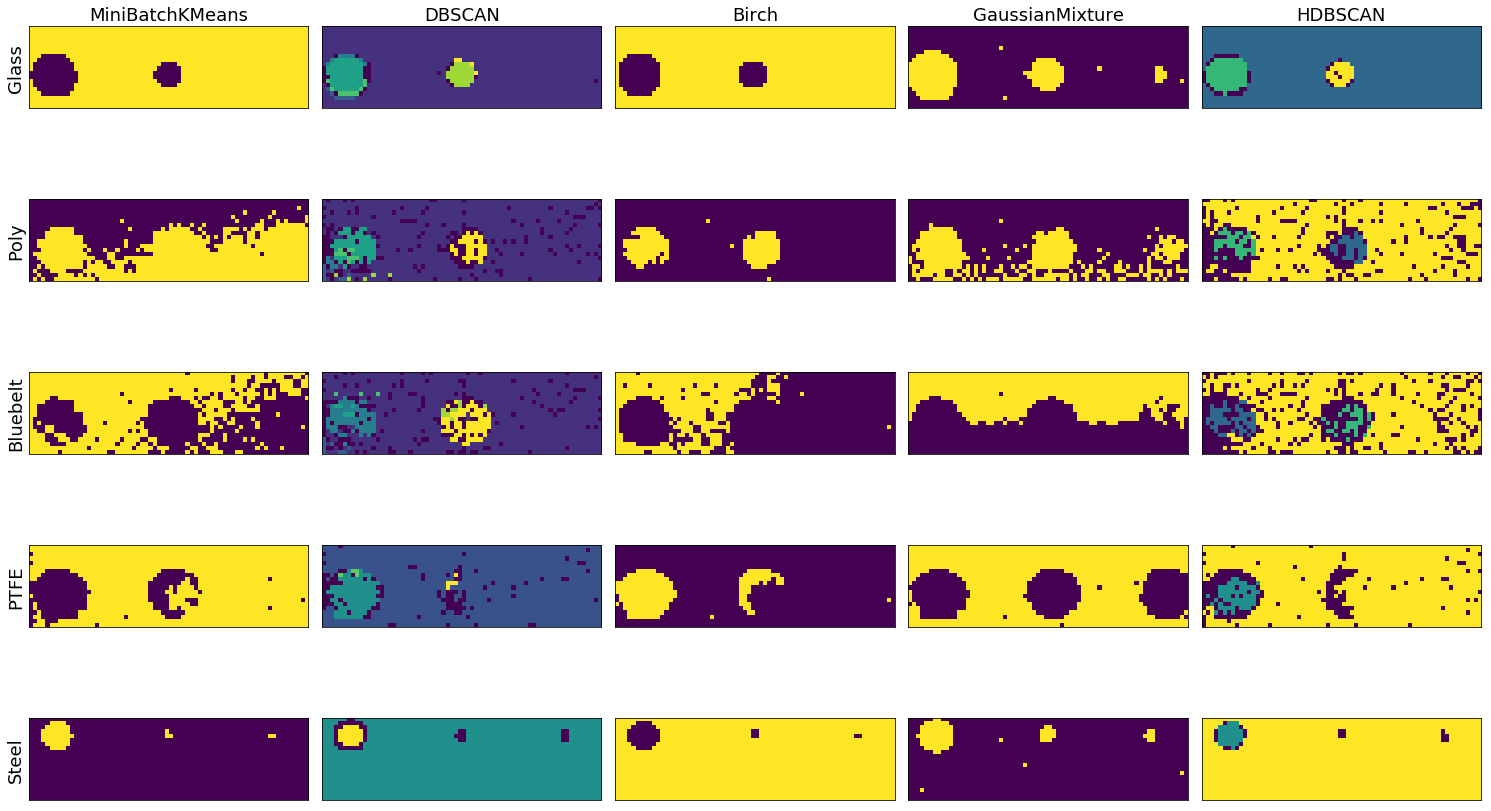

In [21]:
plot_results(1,1,0,mode='de',w_positions=True,scale=True)

Looking at this output I beleive that the algoritms get distracted by the background on the plastic images when you add in the positions. Whereas with the hard materials a global threshold, equivalent to a plane in the clustering hyperspace is sufficient to seperate the different materials however attempting to seperate the materials in the plastics with a global threshold results in what is happening in birch for bluebelt.

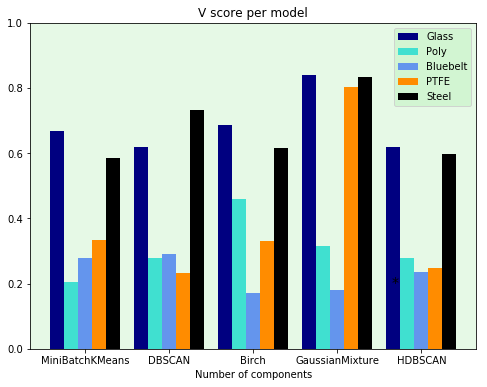

In [24]:
plot_results(0,0,1,mode='de',w_positions=True,scale=True)

Now lets try to make the paremeters a little better.

For n_clusters = 2 The average silhouette_score is : 0.920054442247
For n_clusters = 3 The average silhouette_score is : 0.90648329414
For n_clusters = 4 The average silhouette_score is : 0.877500548042
For n_clusters = 5 The average silhouette_score is : 0.862860487324
For n_clusters = 6 The average silhouette_score is : 0.862062469658


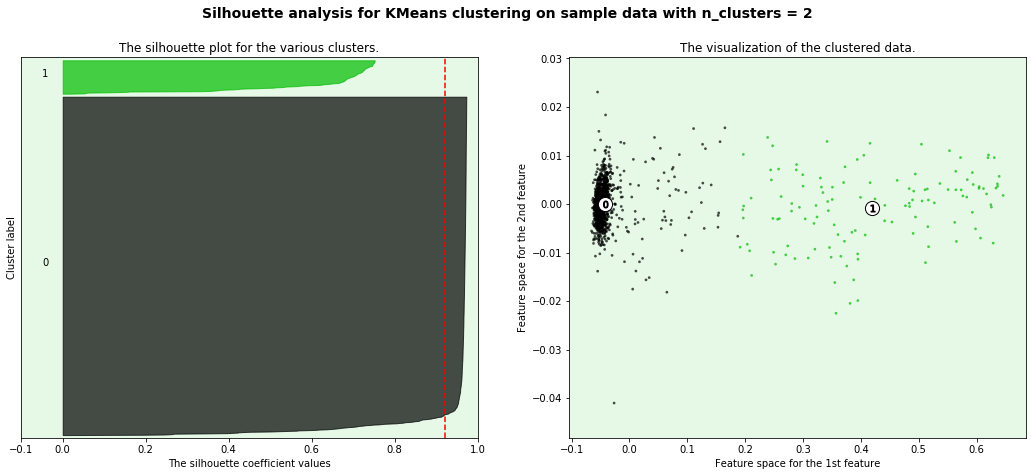

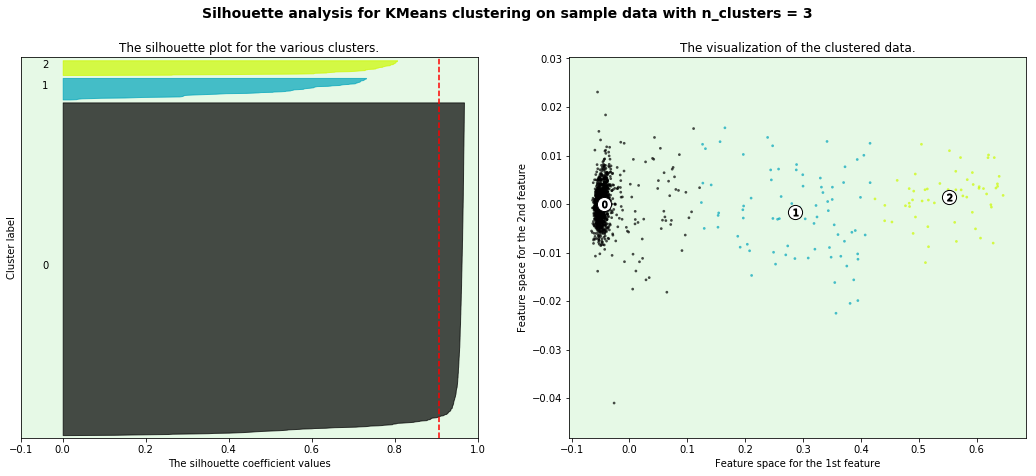

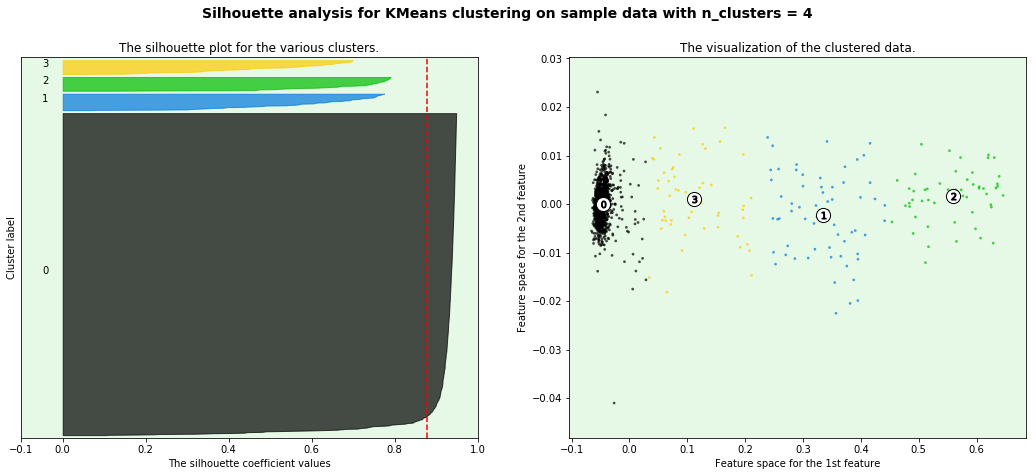

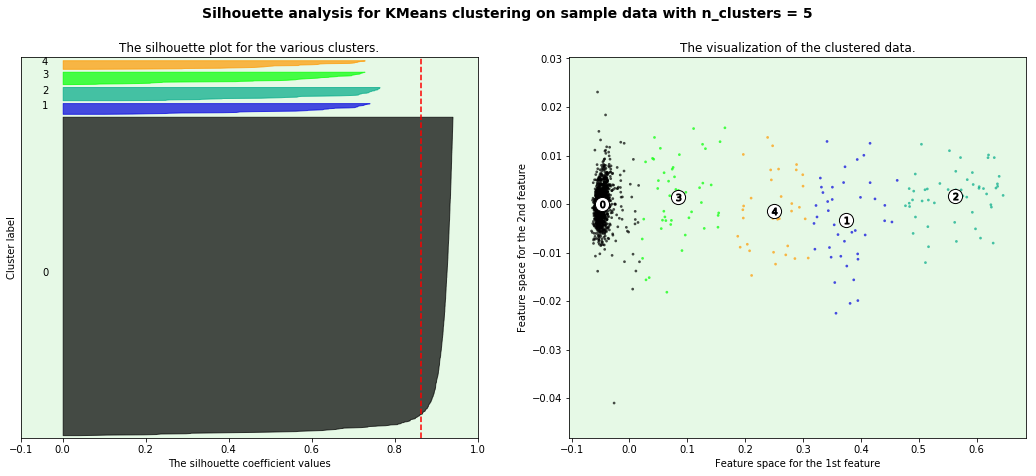

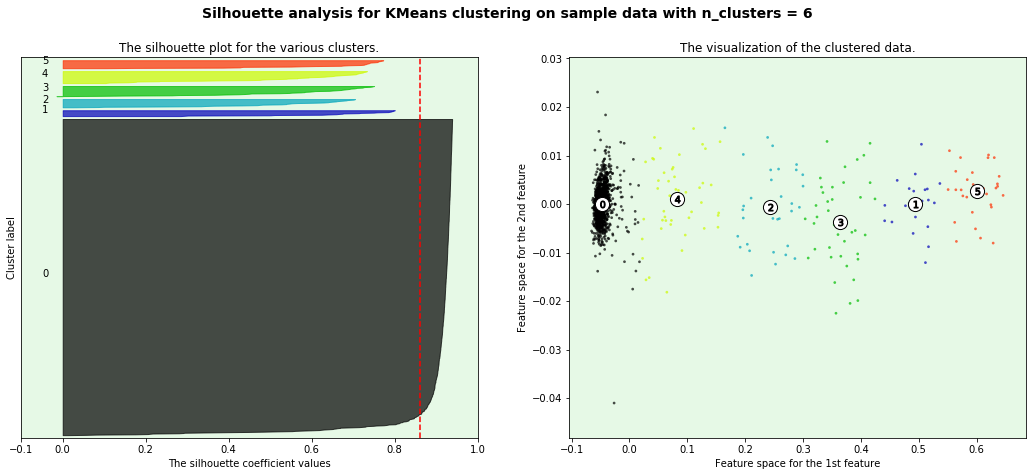

In [30]:
silhouette_analysis('glass')

For n_clusters = 2 The average silhouette_score is : 0.643527603927
For n_clusters = 3 The average silhouette_score is : 0.443545815133
For n_clusters = 4 The average silhouette_score is : 0.433738925692
For n_clusters = 5 The average silhouette_score is : 0.376703797225
For n_clusters = 6 The average silhouette_score is : 0.341394717231


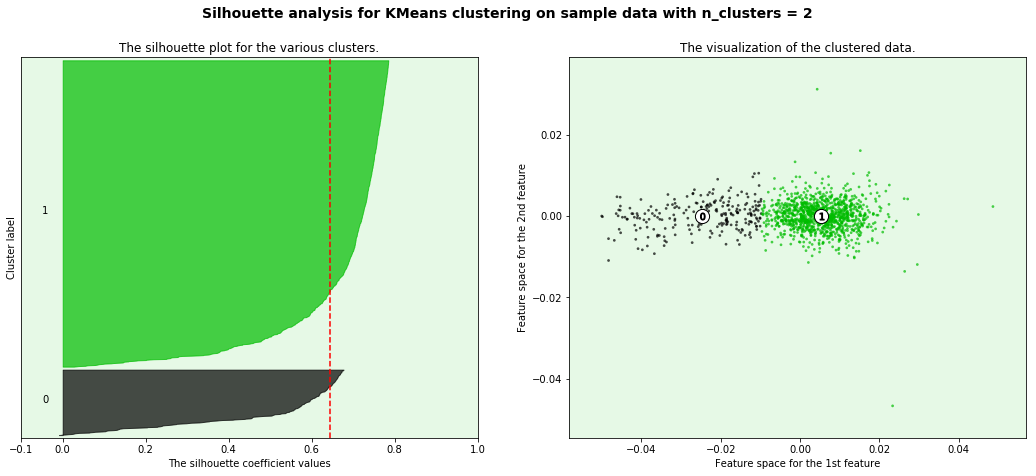

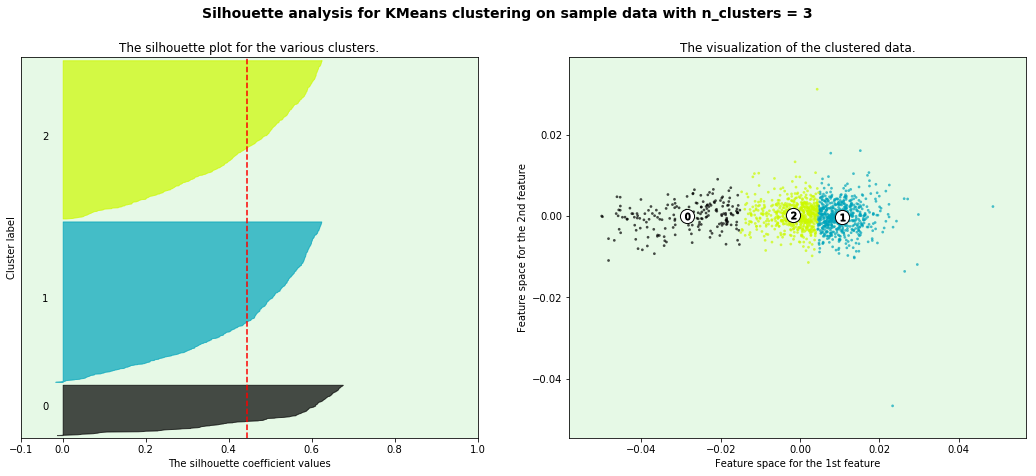

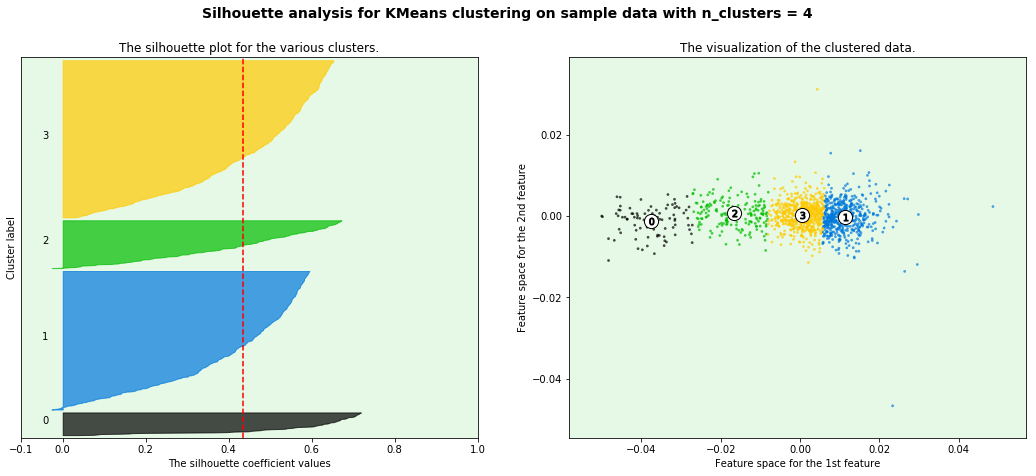

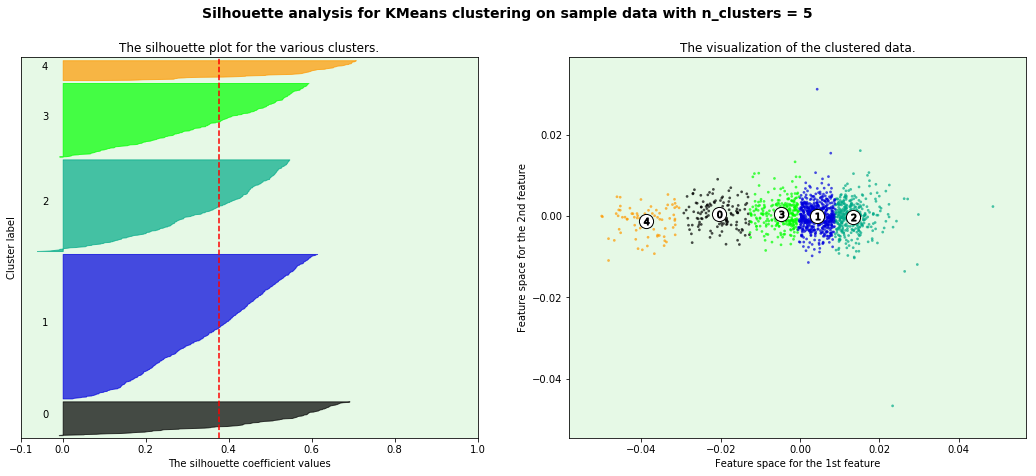

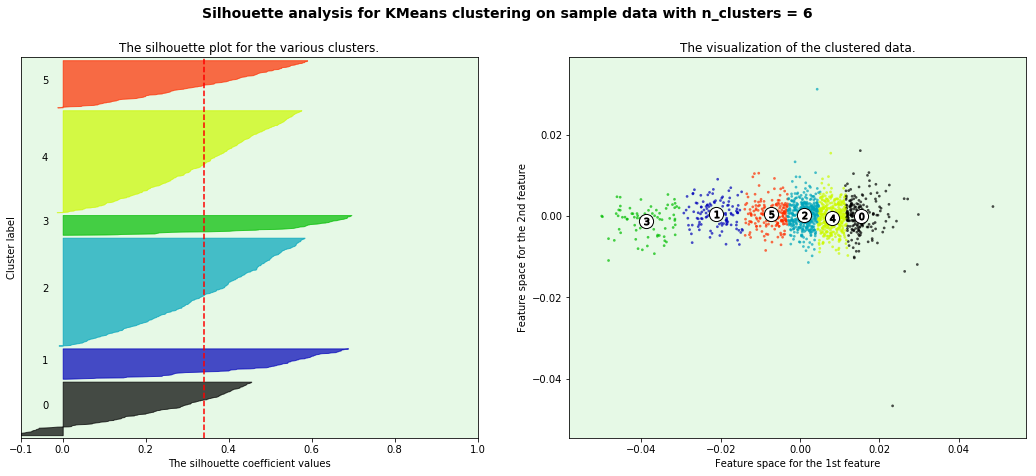

In [31]:
silhouette_analysis('pp')

Same for poly

In [35]:
silhouette_analysis('bb',plotting=False)

For n_clusters = 2 The average silhouette_score is : 0.558489047221
For n_clusters = 3 The average silhouette_score is : 0.461677202478
For n_clusters = 4 The average silhouette_score is : 0.396738411651
For n_clusters = 5 The average silhouette_score is : 0.362898821402
For n_clusters = 6 The average silhouette_score is : 0.338335706546


And for bb

In [36]:
silhouette_analysis('ptfe',plotting=False)

For n_clusters = 2 The average silhouette_score is : 0.724996642564
For n_clusters = 3 The average silhouette_score is : 0.618543915601
For n_clusters = 4 The average silhouette_score is : 0.453628804409
For n_clusters = 5 The average silhouette_score is : 0.440554726751
For n_clusters = 6 The average silhouette_score is : 0.434026905751


Now lets try with the non pca data

In [38]:
silhouette_analysis('bb',w_positions=True,plotting=False)

For n_clusters = 2 The average silhouette_score is : 0.554544985447
For n_clusters = 3 The average silhouette_score is : 0.46776759813
For n_clusters = 4 The average silhouette_score is : 0.402511892424
For n_clusters = 5 The average silhouette_score is : 0.348703005787
For n_clusters = 6 The average silhouette_score is : 0.353113546833


In [39]:
silhouette_analysis('bb',w_positions=True,scale=True,plotting=False)

For n_clusters = 2 The average silhouette_score is : 0.242686579861
For n_clusters = 3 The average silhouette_score is : 0.243173535492
For n_clusters = 4 The average silhouette_score is : 0.280876539539
For n_clusters = 5 The average silhouette_score is : 0.283634035798
For n_clusters = 6 The average silhouette_score is : 0.274542812268


Now I have some actual images of bb in chicken so lets try it on those.

In [40]:
silhouette_analysis('chick_glass',w_positions=True,scale=True,plotting=False)

For n_clusters = 2 The average silhouette_score is : 0.322002365179
For n_clusters = 3 The average silhouette_score is : 0.315939255873
For n_clusters = 4 The average silhouette_score is : 0.362263882224
For n_clusters = 5 The average silhouette_score is : 0.378052942793
For n_clusters = 6 The average silhouette_score is : 0.358068046458


In [45]:
silhouette_analysis('chick_glass',plotting=False)

For n_clusters = 2 The average silhouette_score is : 0.673599818975
For n_clusters = 3 The average silhouette_score is : 0.603219824122
For n_clusters = 4 The average silhouette_score is : 0.53589432553
For n_clusters = 5 The average silhouette_score is : 0.53134080664
For n_clusters = 6 The average silhouette_score is : 0.539259280346


This still doesn't say whether or not the data belongs in only one cluster which is important. Kmeans likes perfect blobs but does not behave well on non isotropic data which I have.

n_digits: 2, 	 n_samples 1360, 	 n_features 2
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.03s	3	0.605	0.754	0.672	0.782	0.605	0.909
random   	0.02s	3	0.605	0.754	0.672	0.782	0.605	0.926
PCA-based	0.00s	3	0.605	0.754	0.672	0.782	0.605	0.921
__________________________________________________________________________________


/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


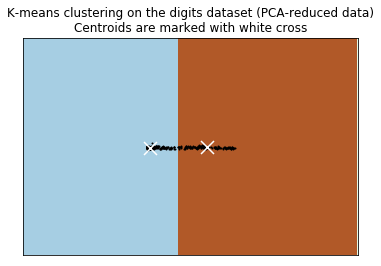

In [51]:
from clustering_comparison import *
kmeans_finetune('glass')

n_digits: 2, 	 n_samples 1360, 	 n_features 2
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.03s	0	0.635	0.607	0.620	0.757	0.607	0.560
random   	0.03s	0	0.632	0.604	0.618	0.755	0.604	0.548
PCA-based	0.02s	0	0.628	0.598	0.612	0.749	0.598	0.541
__________________________________________________________________________________


/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


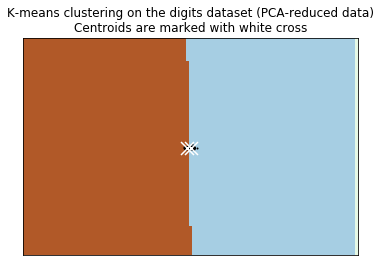

In [52]:
kmeans_finetune('bb')

In [54]:
kmeans_finetune('pp',plotting=False,w_positions=True,scale=True)

n_digits: 2, 	 n_samples 1360, 	 n_features 4
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.09s	4181	0.180	0.128	0.150	0.100	0.128	0.240
random   	0.04s	4181	0.180	0.128	0.150	0.100	0.128	0.248
PCA-based	0.01s	4245	0.021	0.015	0.017	0.008	0.014	0.235
__________________________________________________________________________________


/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [55]:
kmeans_finetune('pp',plotting=False,w_positions=True,scale=True,mode='de')

n_digits: 2, 	 n_samples 1360, 	 n_features 4
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.05s	3866	0.316	0.234	0.268	0.293	0.233	0.277
random   	0.06s	3866	0.316	0.234	0.268	0.293	0.233	0.277
PCA-based	0.01s	3866	0.301	0.220	0.254	0.263	0.220	0.260
__________________________________________________________________________________


/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [58]:
kmeans_finetune('pp',plotting=False,w_positions=True,scale=True,mode='all')

n_digits: 2, 	 n_samples 1360, 	 n_features 7
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.08s	5865	0.618	0.671	0.643	0.786	0.617	0.441
random   	0.04s	5865	0.618	0.671	0.643	0.786	0.617	0.448
PCA-based	0.00s	5865	0.618	0.671	0.643	0.786	0.617	0.447
__________________________________________________________________________________


/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


n_digits: 2, 	 n_samples 1360, 	 n_features 2
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.03s	0	0.669	0.711	0.689	0.823	0.669	0.649
random   	0.05s	0	0.669	0.711	0.689	0.823	0.669	0.651
PCA-based	0.00s	0	0.669	0.711	0.689	0.823	0.669	0.641
__________________________________________________________________________________


/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


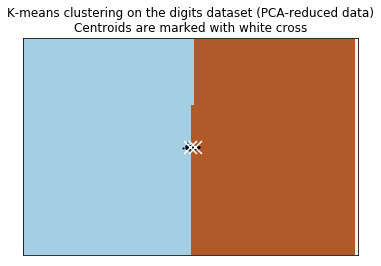

In [60]:
kmeans_finetune('pp')

Now lets try to optimize the indevidual parameters:

## KMeans

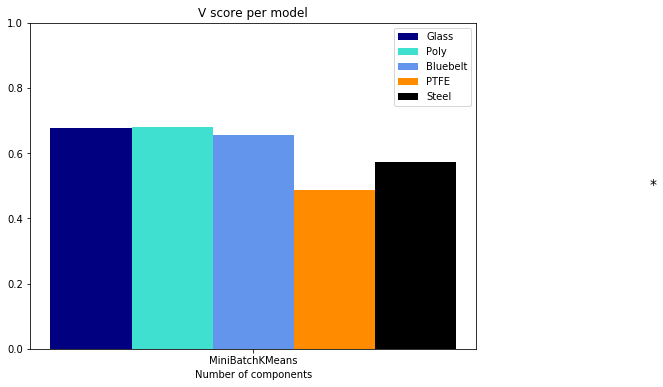

In [7]:
plot_results(cinds=[0]) # Not a lot of ways to improve

Can add some fuzz

## Fuzzy K-means

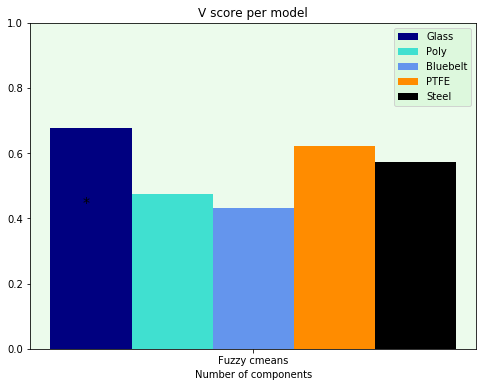

In [44]:
plot_fuzzy(0,0,1,m=50)

Not that different

## Affinity Propagation

In [61]:
default_base = {'quantile': .3,
            'eps': .5,
            'damping': .9,
            'preference': -200,
            'n_neighbors': 2,
            'n_clusters': 2}

algo_params = {'linkage': 'average'}

vs1 = plot_results(0,0,0,cinds=[1],algo_params=algo_params) 
vs2 = plot_results(0,0,0,cinds=[1])

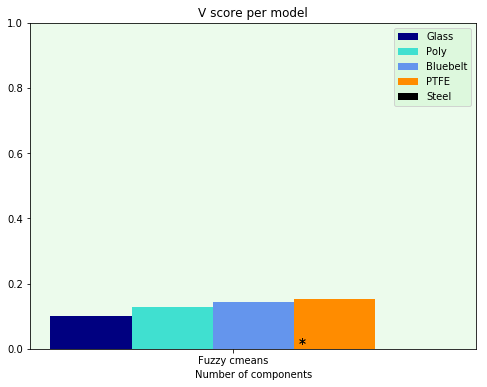

In [62]:
compare_outputs(vs1,vs2) # There is no difference

{'damping': 0.9, 'n_neighbors': 2, 'preference': -200, 'linkage': 'complete', 'quantile': 0.3, 'eps': 0.5, 'n_clusters': 2}
{'damping': 0.9, 'n_neighbors': 2, 'preference': -200, 'linkage': 'complete', 'quantile': 0.3, 'eps': 0.5, 'n_clusters': 2}
{'damping': 0.9, 'n_neighbors': 2, 'preference': -200, 'linkage': 'complete', 'quantile': 0.3, 'eps': 0.5, 'n_clusters': 2}
{'damping': 0.9, 'n_neighbors': 2, 'preference': -200, 'linkage': 'complete', 'quantile': 0.3, 'eps': 0.5, 'n_clusters': 2}
{'damping': 0.9, 'n_neighbors': 2, 'preference': -200, 'linkage': 'complete', 'quantile': 0.3, 'eps': 0.5, 'n_clusters': 2}


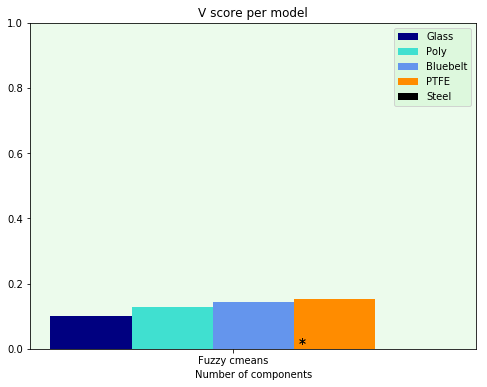

In [66]:
algo_params = {'linkage': 'complete'}

vs2 = plot_results(0,0,0,cinds=[1],algo_params=algo_params)

compare_outputs(vs1,vs2) # There is no difference

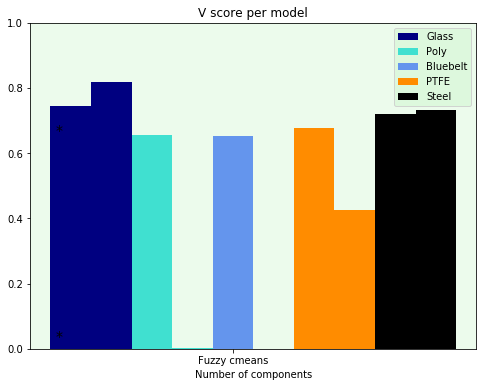

In [60]:
vs1 = plot_results(0,0,0,cinds=[8])
vs2 = plot_results(0,0,0,cinds=[8],mode='all',scale=True)

compare_outputs(vs1,vs2)

## Mean Shift

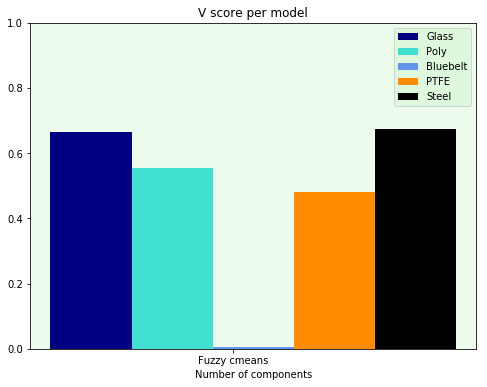

In [70]:
vs1 = plot_results(0,0,0,cinds=[2]) 
vs2 = plot_results(0,0,0,cinds=[2],rng=22)
# Mean shift does not vary
compare_outputs(vs1,vs2)

## Spectral

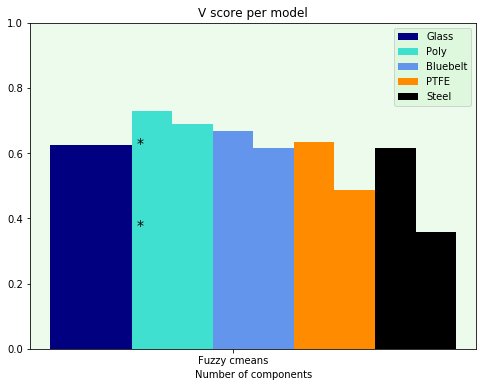

In [79]:
algo_params = {'affinity':'rbf'}

vs1 = plot_results(0,0,0,cinds=[3],rng=20) 
vs2 = plot_results(0,0,0,cinds=[3],rng=44,algo_params=algo_params)
# Mean shift does not vary
compare_outputs(vs1,vs2)

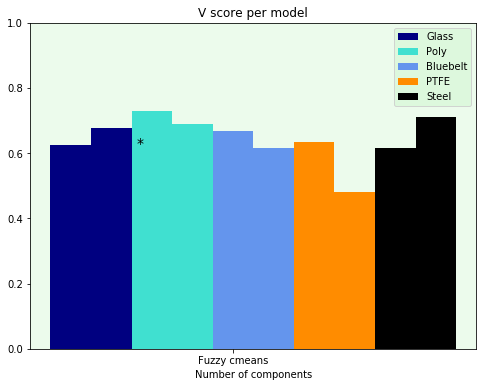

In [81]:
algo_params = {'affinity':'sigmoid'}

vs1 = plot_results(0,0,0,cinds=[3],rng=20) 
vs2 = plot_results(0,0,0,cinds=[3],rng=44,algo_params=algo_params)
# Mean shift does not vary
compare_outputs(vs1,vs2)

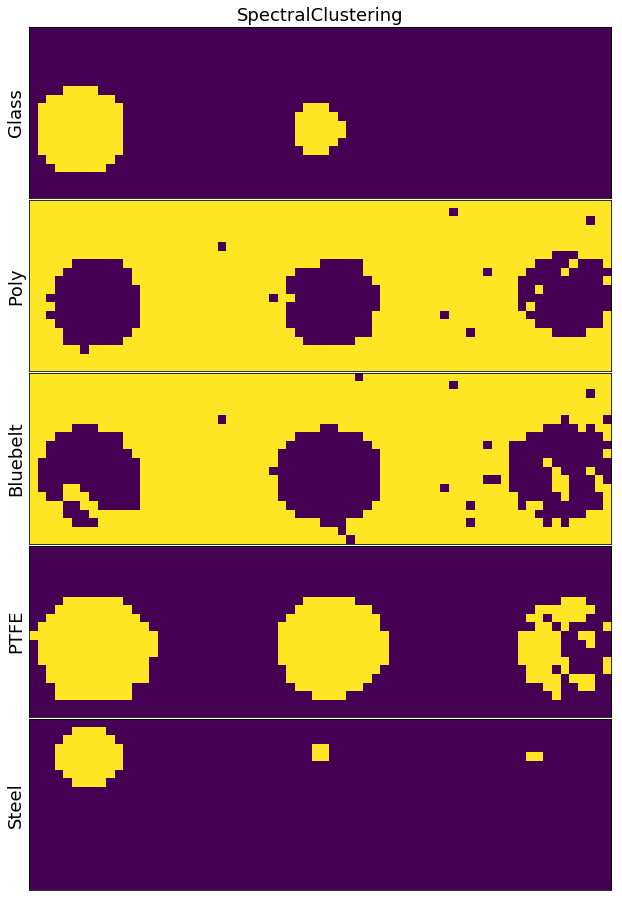

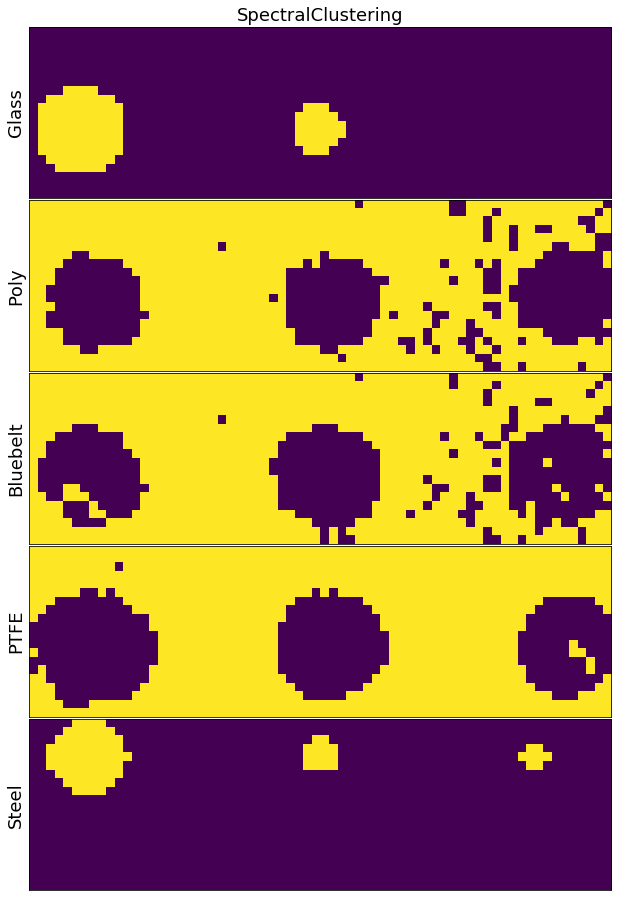

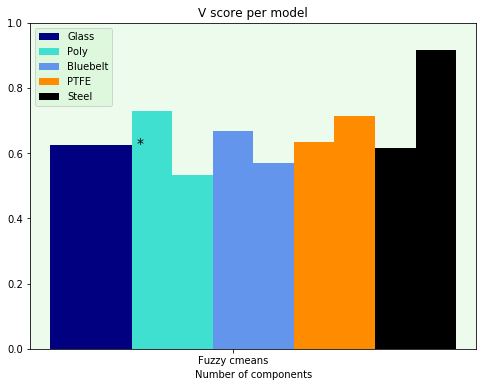

In [91]:
algo_params = {'assign_labels':'discretize'}

vs1 = plot_results(0,1,0,cinds=[3],rng=20) 
vs2 = plot_results(0,1,0,cinds=[3],rng=44,algo_params=algo_params)
# That is something
compare_outputs(vs1,vs2)

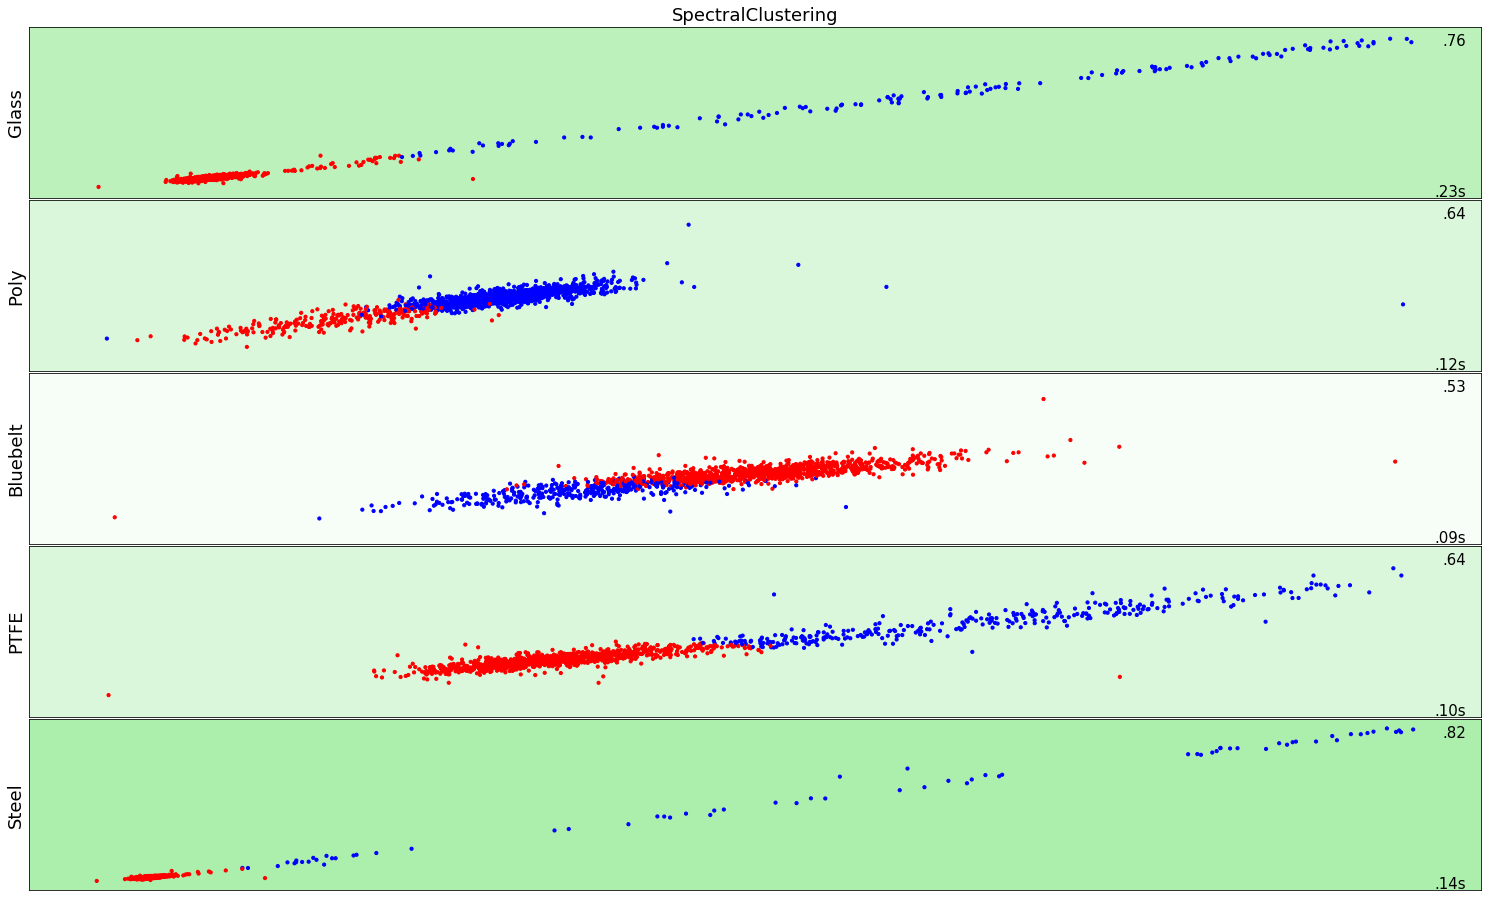

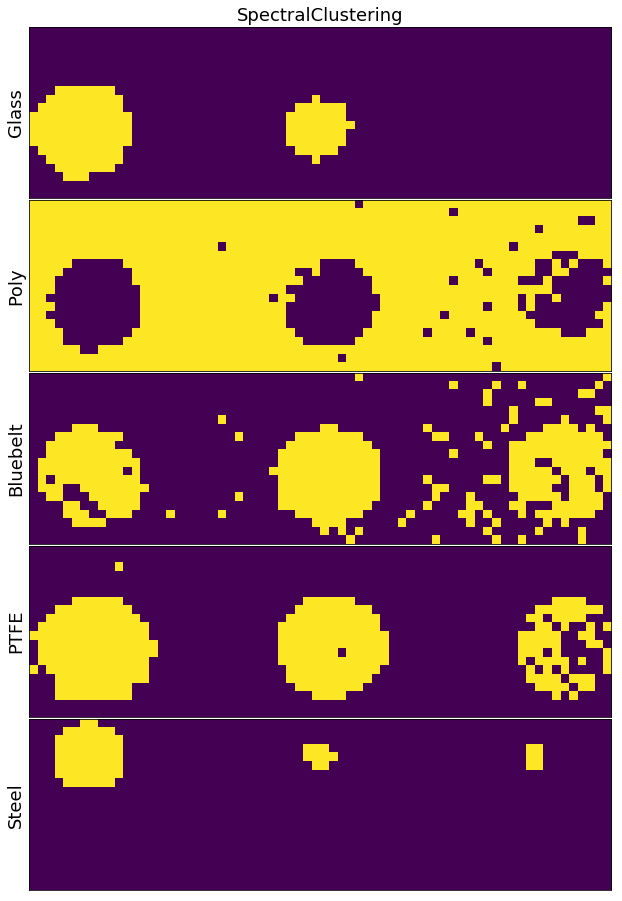

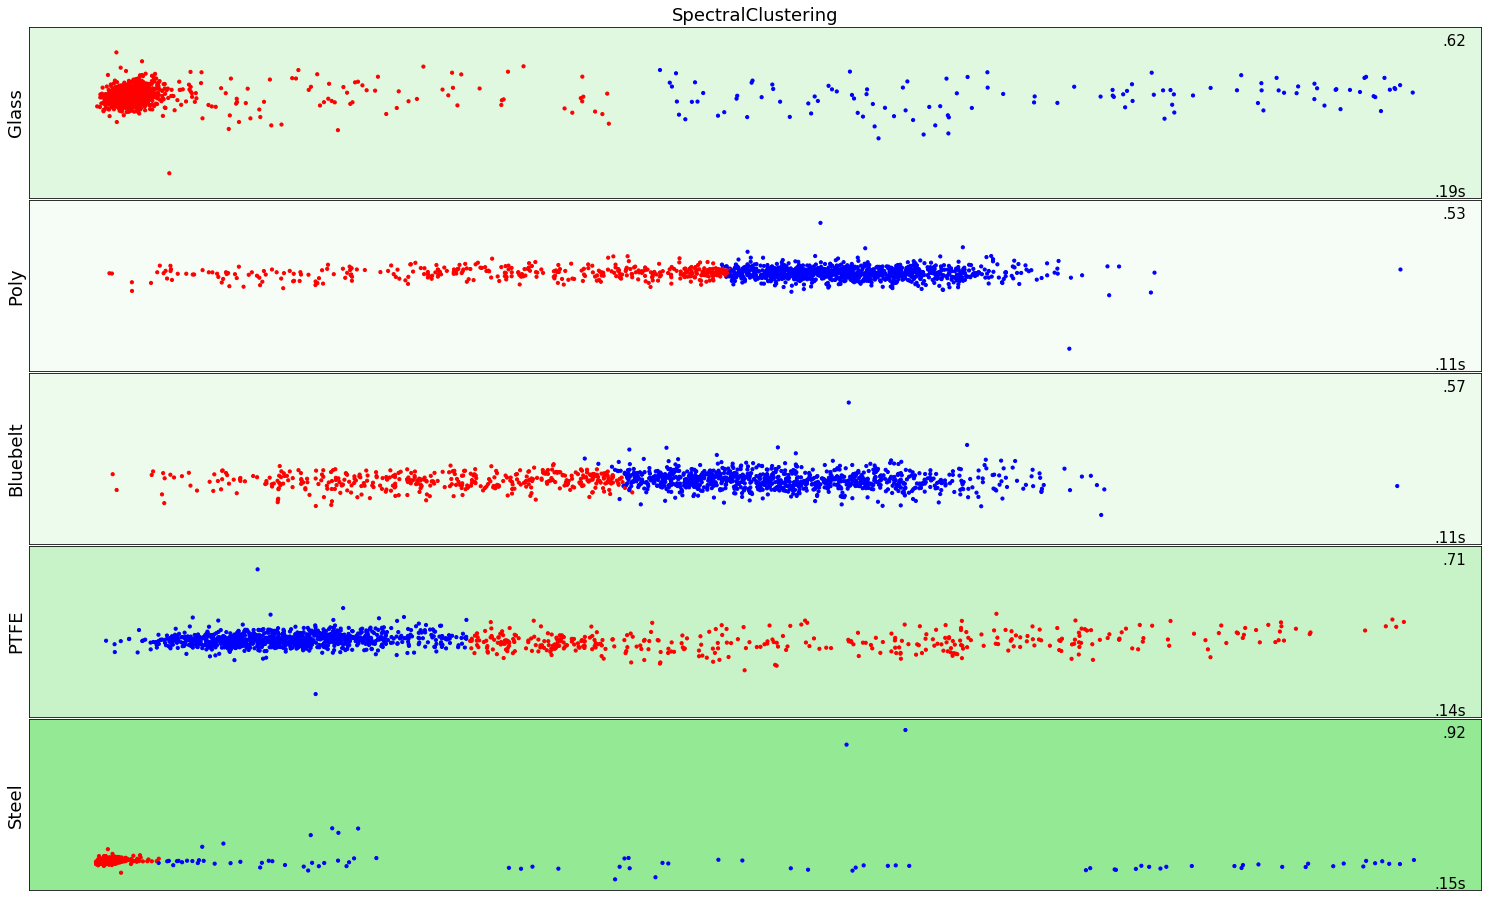

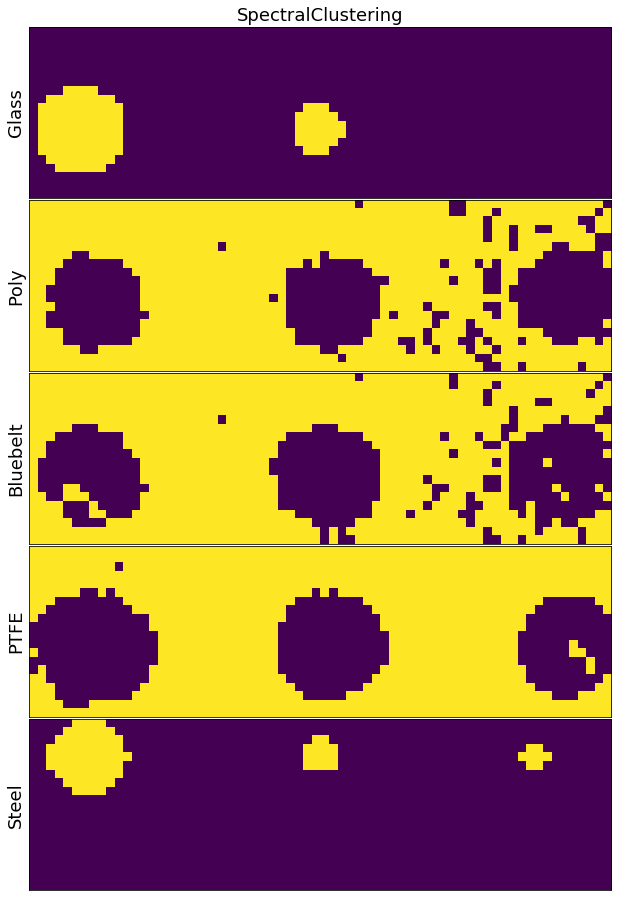

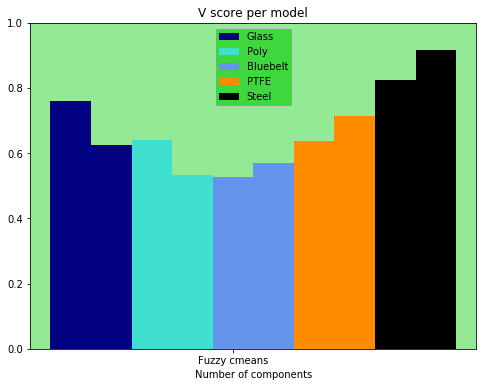

In [92]:
algo_params = {'assign_labels':'discretize'}

vs1 = plot_results(1,1,0,cinds=[3],rng=20,mode='all',algo_params=algo_params) 
vs2 = plot_results(1,1,0,cinds=[3],rng=44,algo_params=algo_params)
# That is something
compare_outputs(vs1,vs2)

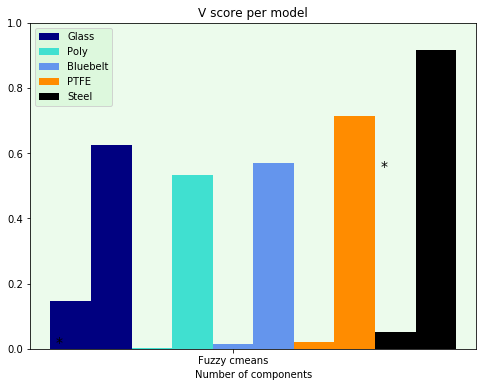

In [90]:
algo_params = {'assign_labels':'discretize'}

vs1 = plot_results(0,0,0,cinds=[3],rng=20,w_positions=True,scale=True,algo_params=algo_params) 
vs2 = plot_results(0,0,0,cinds=[3],rng=44,algo_params=algo_params)
# That is something
compare_outputs(vs1,vs2)

## DBSCAN

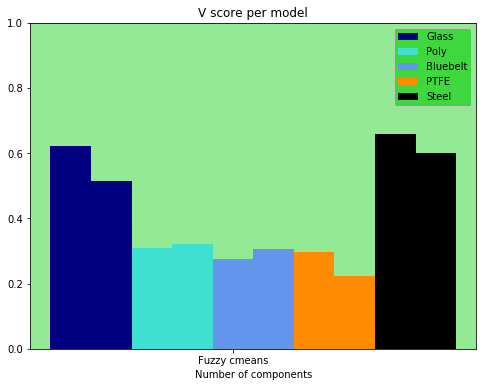

In [105]:
algo_params = {'min_samples':2}

vs1 = plot_results(0,0,0,cinds=[6],rng=20,w_positions=True,scale=True) 
vs2 = plot_results(0,0,0,cinds=[6],rng=44,w_positions=True,scale=True,algo_params=algo_params)
# That is something
compare_outputs(vs1,vs2)

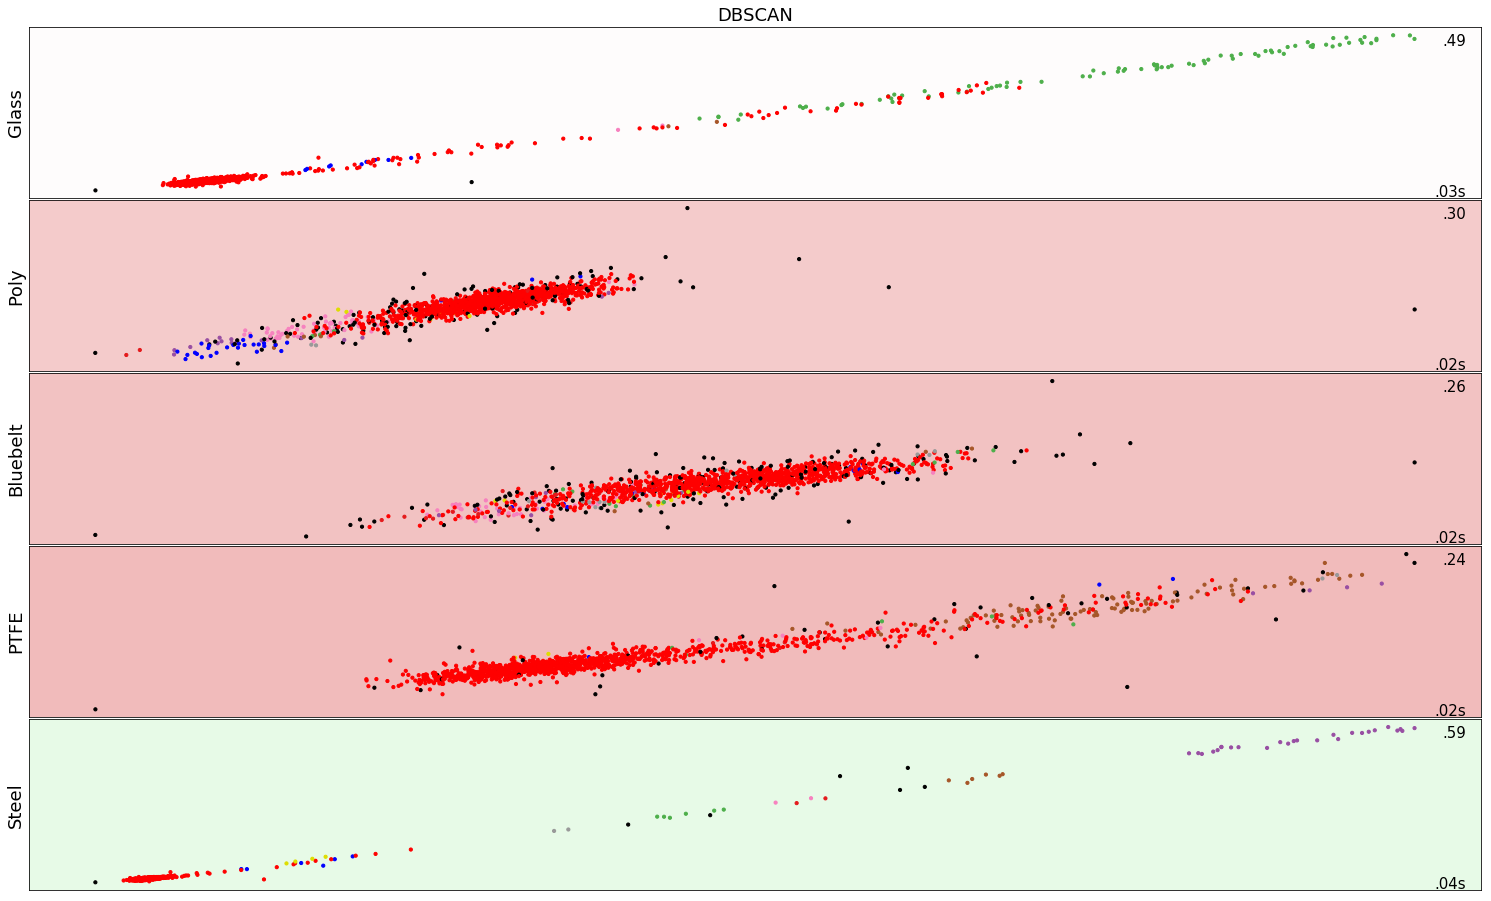

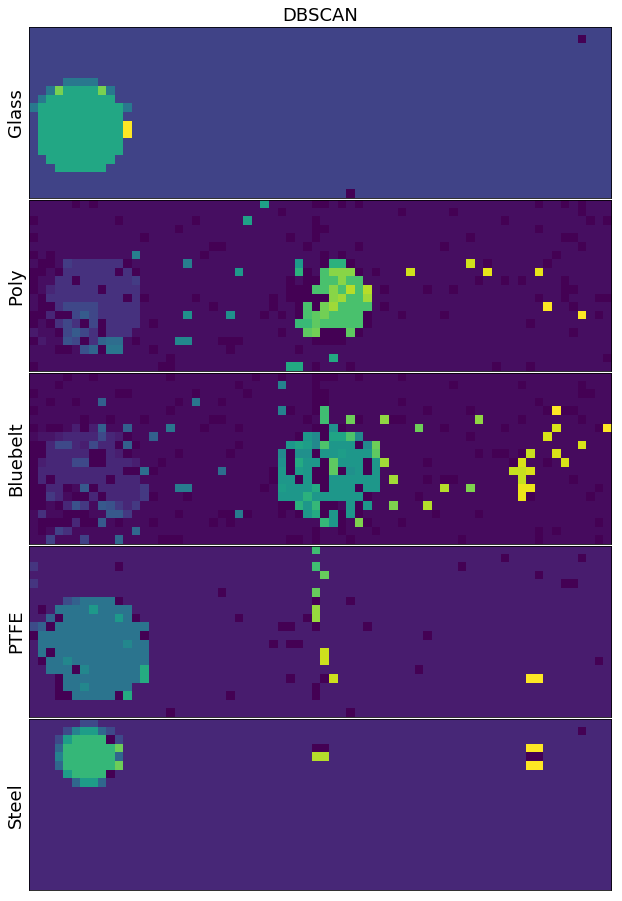

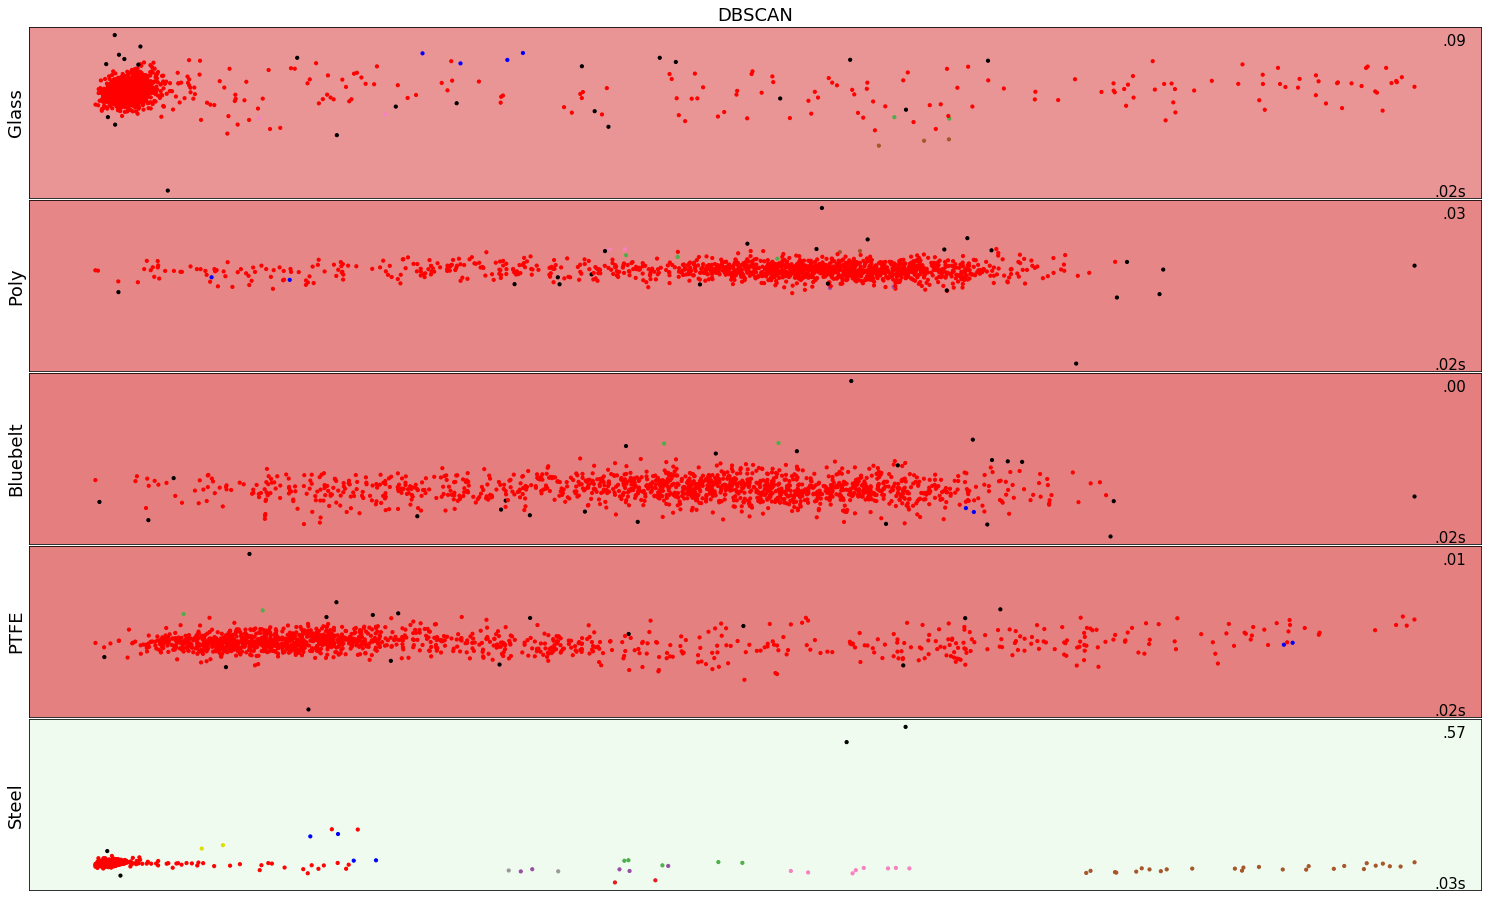

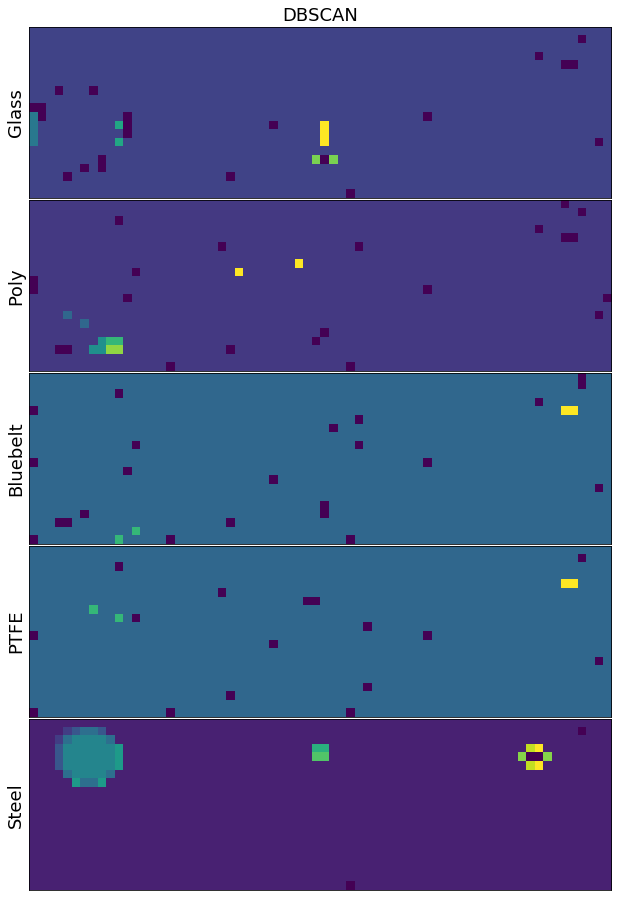

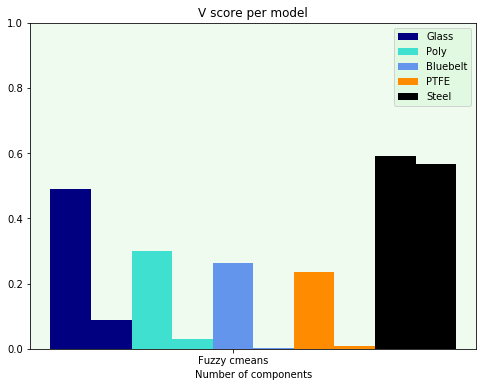

In [128]:
algo_params = {'min_samples':30,'eps':0.75}

vs1 = plot_results(1,1,0,cinds=[6],rng=20,mode='all',scale=True,w_positions=True,algo_params=algo_params) 
vs2 = plot_results(1,1,0,cinds=[6],rng=4,scale=True,w_positions=True,algo_params=algo_params)
# That is something
compare_outputs(vs1,vs2)

I'm asking an odd thing of the algorithms since I wan't them to group something that is not globular

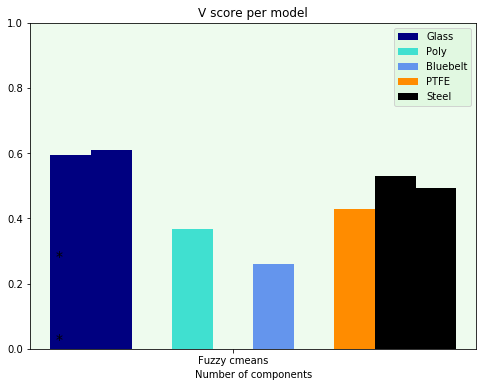

In [132]:
algo_params = {'min_samples':30,'eps':0.75}

vs1 = plot_results(0,0,0,cinds=[9],rng=20,mode='all',algo_params=algo_params) 
vs2 = plot_results(0,0,0,cinds=[9],rng=4,algo_params=algo_params)
# That is something
compare_outputs(vs1,vs2)

## HDBscan

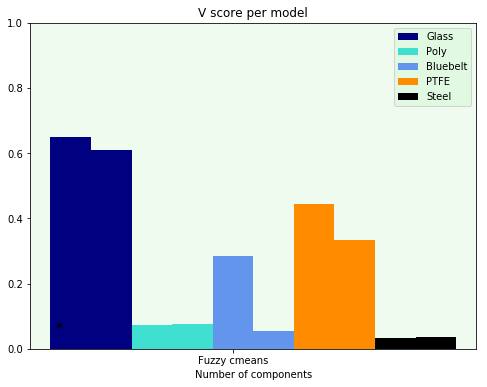

In [155]:
algo_params = {'min_samples':30,'eps':0.75}
algo_params2 = {'min_samples':28,'eps':0.75}

vs1 = plot_results(0,0,0,cinds=[9],rng=10,algo_params=algo_params) 
vs2 = plot_results(0,0,0,cinds=[9],rng=4,algo_params=algo_params2)
# That is something
compare_outputs(vs1,vs2)

## GMM

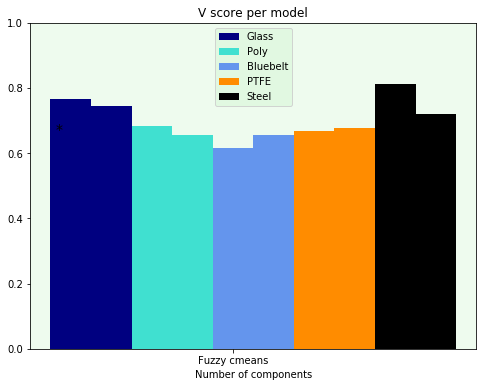

In [158]:
algo_params = {'min_samples':30,'eps':0.75}
algo_params2 = {'min_samples':28,'eps':0.75}

vs1 = plot_results(0,0,0,cinds=[10],rng=10,algo_params=algo_params) 
vs2 = plot_results(0,0,0,cinds=[8],rng=4,algo_params=algo_params2)
# That is something
compare_outputs(vs1,vs2)

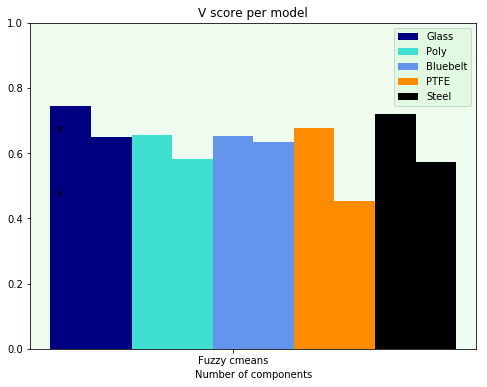

In [159]:
algo_params = {'ct':'tied'}


vs1 = plot_results(0,0,0,cinds=[8],rng=10) 
vs2 = plot_results(0,0,0,cinds=[8],rng=4,algo_params=algo_params)
# That is something
compare_outputs(vs1,vs2)

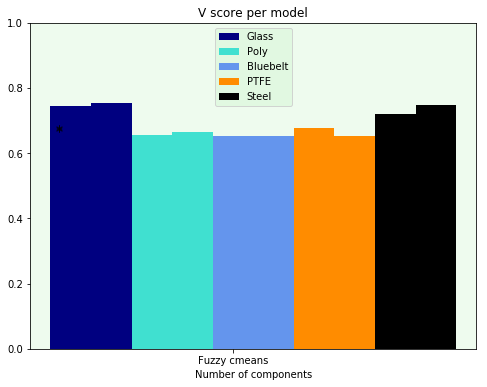

In [160]:
algo_params = {'ct':'diag'}


vs1 = plot_results(0,0,0,cinds=[8],rng=10) 
vs2 = plot_results(0,0,0,cinds=[8],rng=4,algo_params=algo_params)
# That is something
compare_outputs(vs1,vs2)

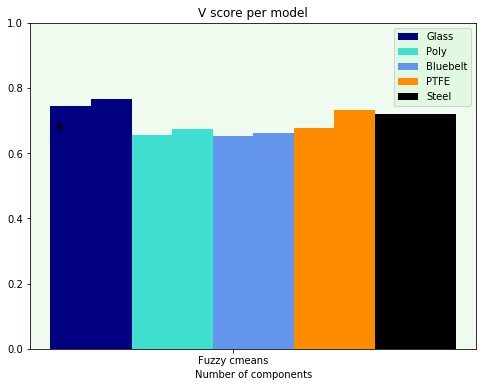

In [161]:
algo_params = {'ct':'spherical'}


vs1 = plot_results(0,0,0,cinds=[8],rng=10) 
vs2 = plot_results(0,0,0,cinds=[8],rng=4,algo_params=algo_params)
# That is something
compare_outputs(vs1,vs2)

## BGMM

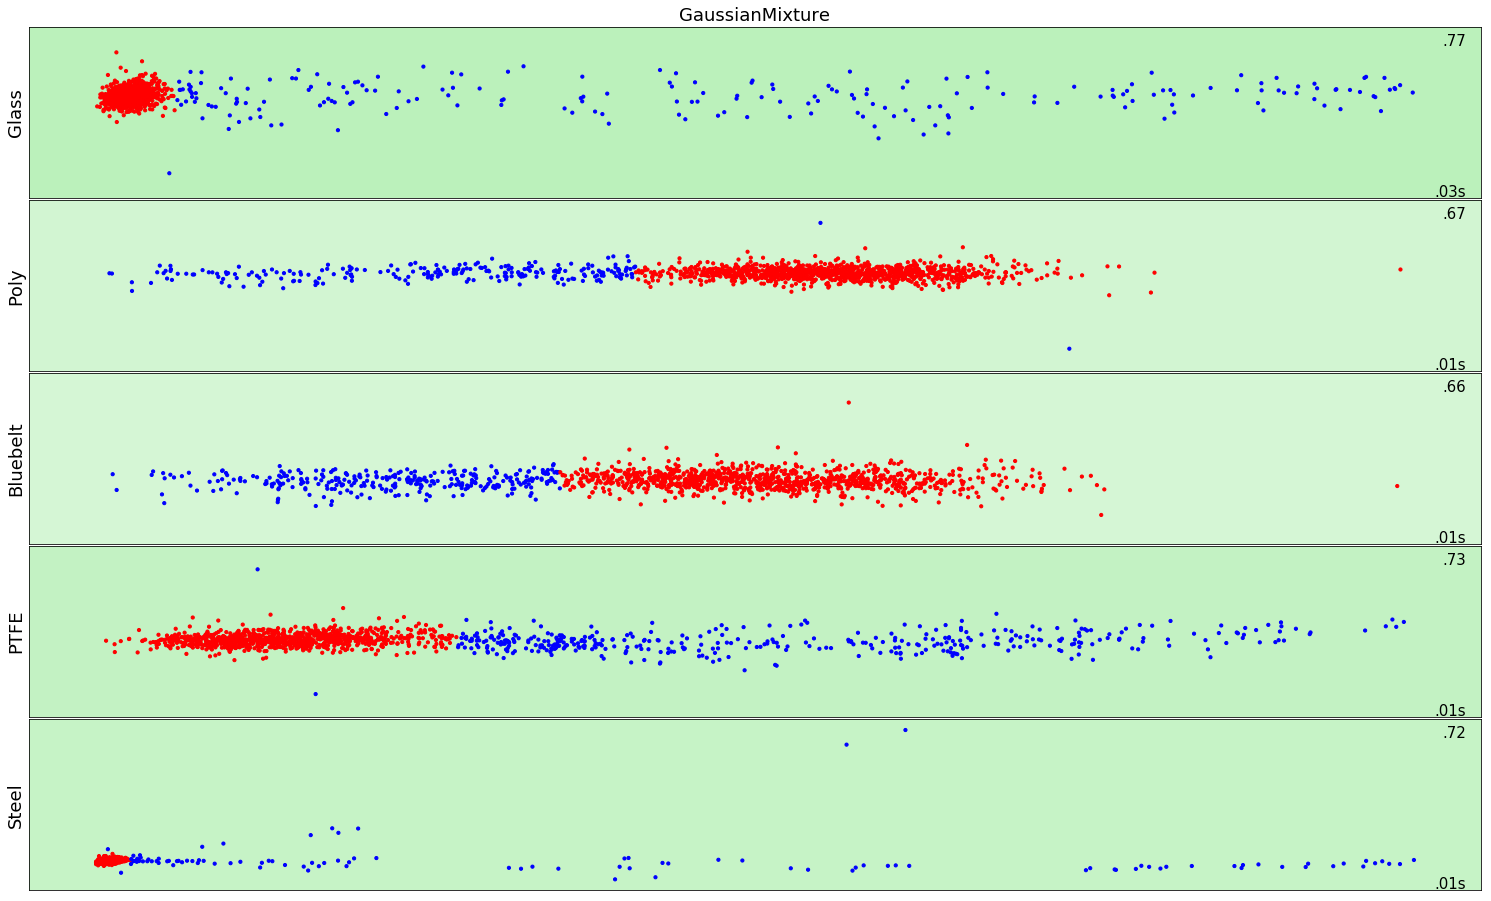

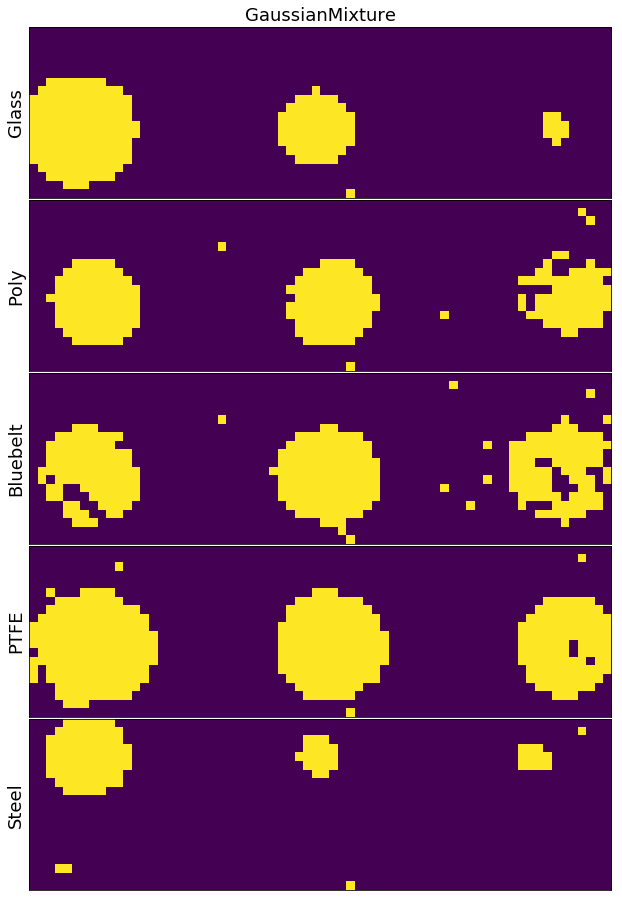

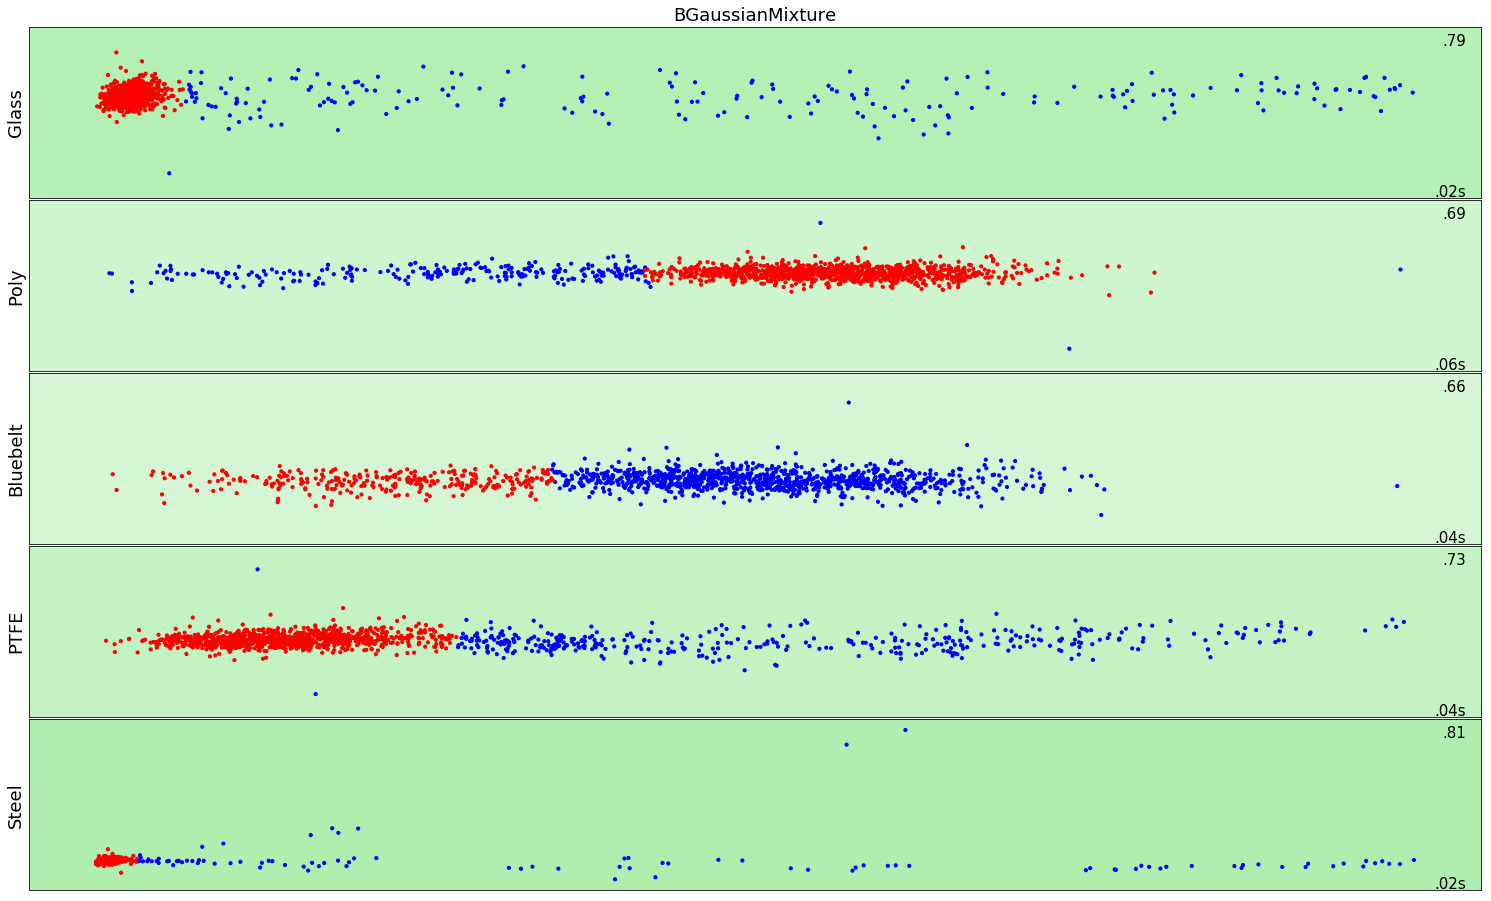

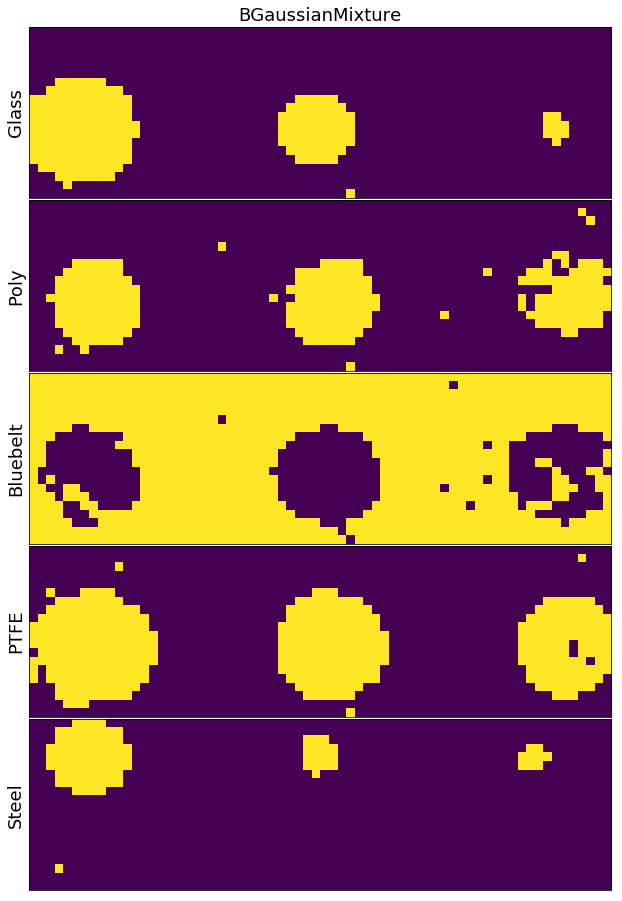

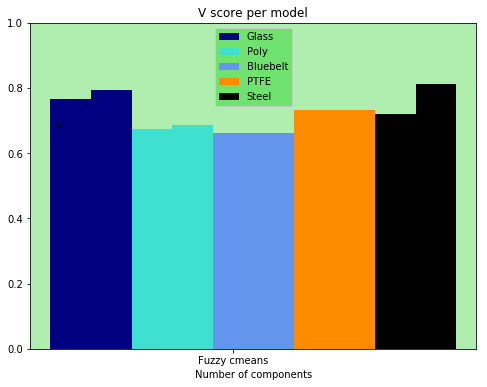

In [167]:
algo_params = {'ct':'spherical'}


vs1 = plot_results(1,1,0,cinds=[8],rng=10,algo_params=algo_params) 
vs2 = plot_results(1,1,0,cinds=[10],rng=4,algo_params=algo_params)
# That is something
compare_outputs(vs1,vs2)

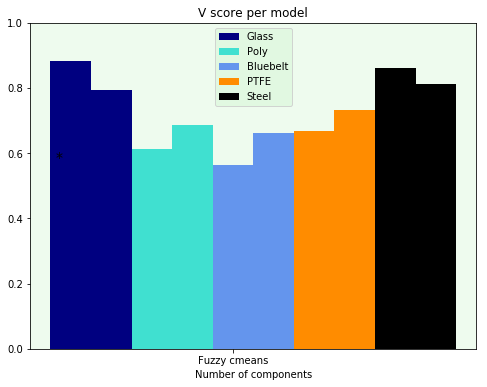

In [163]:
algo_params = {'ct':'spherical'}


vs1 = plot_results(0,0,0,cinds=[10],rng=10,mode='all',algo_params=algo_params) 
vs2 = plot_results(0,0,0,cinds=[10],rng=4,algo_params=algo_params)
# That is something
compare_outputs(vs1,vs2)

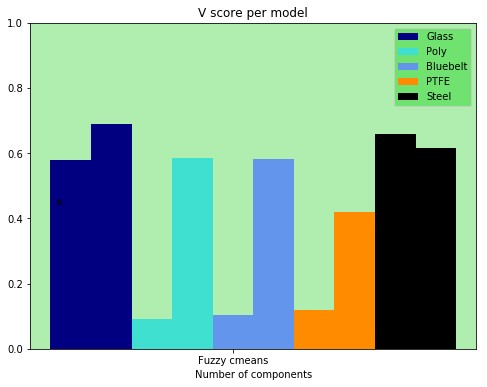

In [170]:
algo_params = {'ct':'spherical'}


vs1 = plot_results(0,0,0,cinds=[10],rng=10,w_positions=True,scale=True,algo_params=algo_params) 
vs2 = plot_results(0,0,0,cinds=[10],rng=4,mode ='all',w_positions=True,scale=True,algo_params=algo_params)
# That is something
compare_outputs(vs1,vs2)